# Tutorial de pandas

El siguiente material está basado en:

* Los tutoriales de [CODEBASICS](http://codebasicshub.com/): 
  * YouTube: https://www.youtube.com/playlist?list=PLeo1K3hjS3uuASpe-1LjfG5f14Bnozjwy
  * GitHub:  https://github.com/codebasics/py/tree/master/pandas
  
* El tutorial de [Pandas for Data Analysis de SciPy 2017 por Daniel Chen](https://www.youtube.com/watch?v=oGzU688xCUs)

* El manual oficial de `pandas` para la versión 0.24.1:
  * https://pandas.pydata.org/pandas-docs/stable/
  * https://pandas.pydata.org/pandas-docs/stable/pandas.pdf   (2977 páginas)

`pandas` es una biblioteca de software escrita como extensión de `NumPy` para manipulación y análisis de datos para el lenguaje de programación Python. En particular, ofrece estructuras de datos y operaciones para manipular tablas numéricas y series temporales.

## Pandas Cheat Sheet

https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf

# 0. Algunos comandos básicos de pandas

Primero que todo cargamos la librería:

In [1]:
import pandas as pd
print("Estamos utilizando la versión de pandas", pd.__version__)

Estamos utilizando la versión de pandas 0.24.2


## Estructuras de datos manejadas por pandas

Dimensiones  | Nombre     | Descripción
-------------|------------|------------
1            |  Series    | Sirve para guardar series de datos (1D)
2            |  DataFrame | Sirve para guardar tablas de datos (2D)

El tipo `DataFrame` es un contenedor de `Series` y las `Series` son contenedores de escalares.

- https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html
- https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html

Inicialmente se crea una `Serie`:

In [2]:
s = pd.Series([1, 3, 5, float('nan'), 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

y creamos un `DataFrame` a partir de un diccionario:

In [3]:
datos_climaticos = {
    'día': ['1/1/2017','1/2/2017','1/3/2017','1/4/2017','1/5/2017','1/6/2017'],
    'temperatura': [32,35,28,24,32,31],
    'velocidad_viento': [6,7,2,7,4,2],
    'evento': ['Lluvia', 'Sol', 'Nublado','Nublado','Lluvia', 'Sol']
}
df = pd.DataFrame(datos_climaticos)
df

,día,temperatura,velocidad_viento,evento
0,1/1/2017,32,6,Lluvia
1,1/2/2017,35,7,Sol
2,1/3/2017,28,2,Nublado
3,1/4/2017,24,7,Nublado
4,1/5/2017,32,4,Lluvia
5,1/6/2017,31,2,Sol


Observe que un `DataFrame` es bastante similar a lo que contiene una hoja de MS EXCEL.

Se muestra el tamaño del `DataFrame`:

In [4]:
df.shape # filas, columnas = df.shape

(6, 4)

Observe que las columnas son de tipo `Series`:

In [5]:
type(df['evento'])

pandas.core.series.Series

In [6]:
type(df)

pandas.core.frame.DataFrame

Alguna información importante sobre el `DataFrame`:

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
día                 6 non-null object
temperatura         6 non-null int64
velocidad_viento    6 non-null int64
evento              6 non-null object
dtypes: int64(2), object(2)
memory usage: 272.0+ bytes


Observe que una serie se puede convertir en un lista de Python:

In [8]:
df['temperatura'].tolist()

[32, 35, 28, 24, 32, 31]

Sin embargo, esto no puede hacerse con varias series al mismo tiempo:

In [9]:
# este comando falla:
#df[['temperatura','velocidad_viento']].tolist()

lo que tendría que hacer es convertir el `DataFrame` a un array de `NumPy`:

In [10]:
import numpy as np
np.array(df[['temperatura','velocidad_viento']]).tolist()

[[32, 6], [35, 7], [28, 2], [24, 7], [32, 4], [31, 2]]

Y también se puede convertir un array de `NumPy` a un `DataFrame` de `pandas`:

In [11]:
pd.DataFrame(np.random.randint(0,100,(4,7)))

,0,1,2,3,4,5,6
0,61,34,84,56,30,88,60
1,97,1,46,90,86,29,17
2,31,2,61,85,75,3,98
3,87,67,4,41,34,6,92


## Filas

In [12]:
df.head()  # si no se pone argumento se muestran 5 filas

,día,temperatura,velocidad_viento,evento
0,1/1/2017,32,6,Lluvia
1,1/2/2017,35,7,Sol
2,1/3/2017,28,2,Nublado
3,1/4/2017,24,7,Nublado
4,1/5/2017,32,4,Lluvia


In [13]:
df.tail(2)  # si no se pone argumento se muestran 5 filas

,día,temperatura,velocidad_viento,evento
4,1/5/2017,32,4,Lluvia
5,1/6/2017,31,2,Sol


Se muestran los índices o etiquetas asociadas a las filas:

In [14]:
print(type(df.index))
df.index

<class 'pandas.core.indexes.range.RangeIndex'>


RangeIndex(start=0, stop=6, step=1)

Se muestra la segunda y tercera fila:

In [15]:
df[1:3]

,día,temperatura,velocidad_viento,evento
1,1/2/2017,35,7,Sol
2,1/3/2017,28,2,Nublado


O alternativamente, se muestra una sola fila así:

In [16]:
df.loc[1]

día                 1/2/2017
temperatura               35
velocidad_viento           7
evento                   Sol
Name: 1, dtype: object

Lo siguiente fallará, ya que no existe una fila con un `index = -1`:

In [17]:
#df.loc[-1]

## Columnas

Se muestran los índices de las columnas

In [18]:
print(type(df.columns))
df.columns

<class 'pandas.core.indexes.base.Index'>


Index(['día', 'temperatura', 'velocidad_viento', 'evento'], dtype='object')

Estos son los tipos de datos de las columnas:

In [19]:
df.dtypes

día                 object
temperatura          int64
velocidad_viento     int64
evento              object
dtype: object

Imprimimos una columna:

In [20]:
df.evento

0     Lluvia
1        Sol
2    Nublado
3    Nublado
4     Lluvia
5        Sol
Name: evento, dtype: object

O incluso mejor:

In [21]:
df['evento']

0     Lluvia
1        Sol
2    Nublado
3    Nublado
4     Lluvia
5        Sol
Name: evento, dtype: object

De hecho es preferible la notación anterior ya que, podría existir una colisión con los nombres reservados de los 
métodos y atributos del objeto `DataFrame`, o a veces el nombre de la columna del `DataFrame` tiene incluídos espacios.

Podemos también referirnos a dos o más columnas al mismo tiempo:

In [22]:
df[['evento','temperatura']]

,evento,temperatura
0,Lluvia,32
1,Sol,35
2,Nublado,28
3,Nublado,24
4,Lluvia,32
5,Sol,31


In [23]:
df

,día,temperatura,velocidad_viento,evento
0,1/1/2017,32,6,Lluvia
1,1/2/2017,35,7,Sol
2,1/3/2017,28,2,Nublado
3,1/4/2017,24,7,Nublado
4,1/5/2017,32,4,Lluvia
5,1/6/2017,31,2,Sol


## Cambiando el tipo de dato de una columna

Al mismo tiempo observe la forma como se crea una columna nueva:

In [24]:
df['temperatura_como_float'] = df['temperatura'].astype(float)
df

,día,temperatura,velocidad_viento,evento,temperatura_como_float
0,1/1/2017,32,6,Lluvia,32.0
1,1/2/2017,35,7,Sol,35.0
2,1/3/2017,28,2,Nublado,28.0
3,1/4/2017,24,7,Nublado,24.0
4,1/5/2017,32,4,Lluvia,32.0
5,1/6/2017,31,2,Sol,31.0


## Borrando columnas

Las columnas se pueden borrar de la siguiente manera:

In [25]:
del df['temperatura_como_float']  # del df.temperatura_como_float no funciona
df

,día,temperatura,velocidad_viento,evento
0,1/1/2017,32,6,Lluvia
1,1/2/2017,35,7,Sol
2,1/3/2017,28,2,Nublado
3,1/4/2017,24,7,Nublado
4,1/5/2017,32,4,Lluvia
5,1/6/2017,31,2,Sol


In [26]:
df = df.drop('evento', axis=1) # o utilice "inplace=True"
df

,día,temperatura,velocidad_viento
0,1/1/2017,32,6
1,1/2/2017,35,7
2,1/3/2017,28,2
3,1/4/2017,24,7
4,1/5/2017,32,4
5,1/6/2017,31,2


en el comando anterior, con `axis=0`, lo que pasa es que borra filas.

## Algunas operaciones básicas con los `DataFrame`s

In [27]:
datos_climaticos = {
    'día': ['1/1/2017','1/2/2017','1/3/2017','1/4/2017','1/5/2017','1/6/2017'],
    'temperatura': [32,35,28,24,32,31],
    'velocidad_viento': [6,7,2,7,4,2],
    'evento': ['Lluvia', 'Sol', 'Nublado','Nublado','Lluvia', 'Sol']
}
df = pd.DataFrame(datos_climaticos)
df

,día,temperatura,velocidad_viento,evento
0,1/1/2017,32,6,Lluvia
1,1/2/2017,35,7,Sol
2,1/3/2017,28,2,Nublado
3,1/4/2017,24,7,Nublado
4,1/5/2017,32,4,Lluvia
5,1/6/2017,31,2,Sol


A continuación se presenta un breve resumen estadístico de los datos:

In [28]:
df.describe()

,temperatura,velocidad_viento
count,6.000000,6.000000
mean,30.333333,4.666667
std,3.829708,2.338090
min,24.000000,2.000000
25%,28.750000,2.500000
50%,31.500000,5.000000
75%,32.000000,6.750000
max,35.000000,7.000000


O se calculan dichos datos uno a uno:

In [29]:
print(df['temperatura'].mean())
print(df['temperatura'].std())
print(df['temperatura'].min())
print(df['temperatura'].quantile(0.25))
print(df['temperatura'].max())

30.333333333333332
3.8297084310253524
24
28.75
35


Las operaciones con las series son muchas y se listan aquí: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html (busca en esa página `min()`, `max()`, `mean()`, etc).

Se pueden crear arrays lógicos con los `DataFrame`s; por ejemplo:

In [30]:
df['temperatura'] >= 32

0     True
1     True
2    False
3    False
4     True
5    False
Name: temperatura, dtype: bool

Dichos arrays lógicos se utilizan para extraer del `DataFrame` aquellas filas con la información que cumplen los criterios:

In [31]:
df[(df['temperatura'] >= 32) & (df['velocidad_viento'] >=6)]

,día,temperatura,velocidad_viento,evento
0,1/1/2017,32,6,Lluvia
1,1/2/2017,35,7,Sol


Se selecciona el día con la temperatura máxima:

In [32]:
df['día'][df['temperatura'] == df.temperatura.max()]

1    1/2/2017
Name: día, dtype: object

In [33]:
df[['día','temperatura']][df['temperatura'] == df.temperatura.max()]

,día,temperatura
1,1/2/2017,35


O incluso toda su fila:

In [34]:
df[df['temperatura'] == df['temperatura'].max()]

,día,temperatura,velocidad_viento,evento
1,1/2/2017,35,7,Sol


## Otras operaciones

Transponiendo una tabla:

In [35]:
df.T

,0,1,2,3,4,5
día,1/1/2017,1/2/2017,1/3/2017,1/4/2017,1/5/2017,1/6/2017
temperatura,32,35,28,24,32,31
velocidad_viento,6,7,2,7,4,2
evento,Lluvia,Sol,Nublado,Nublado,Lluvia,Sol


Los datos se pueden ordenar por una de las columnas:

In [36]:
df.sort_values(by='temperatura')

,día,temperatura,velocidad_viento,evento
3,1/4/2017,24,7,Nublado
2,1/3/2017,28,2,Nublado
5,1/6/2017,31,2,Sol
0,1/1/2017,32,6,Lluvia
4,1/5/2017,32,4,Lluvia
1,1/2/2017,35,7,Sol


Se puede calcular un histograma de los datos con `.value_counts()`:

In [37]:
df['evento'].value_counts()

Sol        2
Lluvia     2
Nublado    2
Name: evento, dtype: int64

# 1. Indexación de los `DataFrame`s

La idea de la indexación es extraer un subconjunto de datos del `DataFrame`.

Los `DataFrame`s se pueden indexar de diferentes formas, a saber:

- Como listas, es decir, utilizando un número entero que indique la posición.
- Como diccionarios, utilizando una etiqueta.
- Como arrays de `NumPy`, de modo que se pueden utilizar números enteros, slicing o arrays lógicos (boolean masks).

In [38]:
df

,día,temperatura,velocidad_viento,evento
0,1/1/2017,32,6,Lluvia
1,1/2/2017,35,7,Sol
2,1/3/2017,28,2,Nublado
3,1/4/2017,24,7,Nublado
4,1/5/2017,32,4,Lluvia
5,1/6/2017,31,2,Sol


In [39]:
df.index

RangeIndex(start=0, stop=6, step=1)

En caso que no quiera utilizar como índices los números del 0 al 5 sino otra columna como las fechas, puedo hacer los siguiente:

In [40]:
df.set_index('día', inplace=True)
df

,temperatura,velocidad_viento,evento
día,,,
1/1/2017,32,6,Lluvia
1/2/2017,35,7,Sol
1/3/2017,28,2,Nublado
1/4/2017,24,7,Nublado
1/5/2017,32,4,Lluvia
1/6/2017,31,2,Sol


El `inplace=True` hace que la tabla se modifique. Ahora se pueden hacer cosas como mostra la fila asociada a la fecha:

In [41]:
df.loc['1/3/2017']

temperatura              28
velocidad_viento          2
evento              Nublado
Name: 1/3/2017, dtype: object

Observe el uso del slicing con etiquetas. En este caso trae desde el inicio hasta el final (inclusive).

In [42]:
df.loc['1/3/2017':'1/5/2017']

,temperatura,velocidad_viento,evento
día,,,
1/3/2017,28,2,Nublado
1/4/2017,24,7,Nublado
1/5/2017,32,4,Lluvia


Y se restaura el índice original:

In [43]:
df.reset_index(inplace=True)
df

,día,temperatura,velocidad_viento,evento
0,1/1/2017,32,6,Lluvia
1,1/2/2017,35,7,Sol
2,1/3/2017,28,2,Nublado
3,1/4/2017,24,7,Nublado
4,1/5/2017,32,4,Lluvia
5,1/6/2017,31,2,Sol


In [44]:
df.set_index('evento',inplace=True)
df

,día,temperatura,velocidad_viento
evento,,,
Lluvia,1/1/2017,32,6
Sol,1/2/2017,35,7
Nublado,1/3/2017,28,2
Nublado,1/4/2017,24,7
Lluvia,1/5/2017,32,4
Sol,1/6/2017,31,2


## Seleccionando los datos con `.loc`, `.at` e `.iloc`

El `.loc` sirve para acceder a un grupo de filas y columnas utilizando **etiquetas** o un **array booleano**, como:
```python
>>> df.loc[etiquetas_filas, etiquetas_columnas]
```

In [45]:
df

,día,temperatura,velocidad_viento
evento,,,
Lluvia,1/1/2017,32,6
Sol,1/2/2017,35,7
Nublado,1/3/2017,28,2
Nublado,1/4/2017,24,7
Lluvia,1/5/2017,32,4
Sol,1/6/2017,31,2


In [46]:
df.loc['Sol','temperatura']

evento
Sol    35
Sol    31
Name: temperatura, dtype: int64

In [47]:
# df['Lluvia'] # fallaría
df.loc['Lluvia']  

,día,temperatura,velocidad_viento
evento,,,
Lluvia,1/1/2017,32,6
Lluvia,1/5/2017,32,4


In [48]:
df.loc[['Lluvia','Sol']]

,día,temperatura,velocidad_viento
evento,,,
Lluvia,1/1/2017,32,6
Lluvia,1/5/2017,32,4
Sol,1/2/2017,35,7
Sol,1/6/2017,31,2


El `.at` permite acceder a un único valor:

In [49]:
df.at['Sol','temperatura']

array([35, 31])

El `.iloc` sirve para acceder a los datos utilizando **enteros**, de 
forma similar a como se accede, indexa, y se aplica slicing a un array de `NumPy`, como:
```python
>>> df.iloc[posición_filas, posición_columnas]
```

In [50]:
df

,día,temperatura,velocidad_viento
evento,,,
Lluvia,1/1/2017,32,6
Sol,1/2/2017,35,7
Nublado,1/3/2017,28,2
Nublado,1/4/2017,24,7
Lluvia,1/5/2017,32,4
Sol,1/6/2017,31,2


In [51]:
df.iloc[3]

día                 1/4/2017
temperatura               24
velocidad_viento           7
Name: Nublado, dtype: object

Trayendo la última fila:

In [52]:
df.iloc[-1]

día                 1/6/2017
temperatura               31
velocidad_viento           2
Name: Sol, dtype: object

In [53]:
df.iloc[3,1] = 10
df

,día,temperatura,velocidad_viento
evento,,,
Lluvia,1/1/2017,32,6
Sol,1/2/2017,35,7
Nublado,1/3/2017,28,2
Nublado,1/4/2017,10,7
Lluvia,1/5/2017,32,4
Sol,1/6/2017,31,2


In [54]:
df.iloc[2:5,0]

evento
Nublado    1/3/2017
Nublado    1/4/2017
Lluvia     1/5/2017
Name: día, dtype: object

In [55]:
df.iloc[:,1]

evento
Lluvia     32
Sol        35
Nublado    28
Nublado    10
Lluvia     32
Sol        31
Name: temperatura, dtype: int64

# 2. Aplicando funciones a `DataFrame`s

Creemos nuestro `DataFrame`:

In [56]:
df = pd.DataFrame({
    'a': [1, 2, 3],
    'b': [10, 20, 30],
    'c': [100, 200, 300]    
})
df

,a,b,c
0,1,10,100
1,2,20,200
2,3,30,300


Y hagamos operaciones con las columnas:

In [57]:
df['a'] ** 2

0    1
1    4
2    9
Name: a, dtype: int64

O creemos nuestras propias funciones y apliquémoslas a los `DataFrame`s:

In [58]:
elevar_al_cuadrado = lambda x : x**2
df['a'].apply(elevar_al_cuadrado)

0    1
1    4
2    9
Name: a, dtype: int64

In [59]:
elevar_a_la_n = lambda x,n : x**n
df['a'].apply(elevar_a_la_n, n=2)

0    1
1    4
2    9
Name: a, dtype: int64

Observe que en este caso, se aplica la función a cada columna:

In [60]:
def imprima(x):
    print(x)
    
df.apply(imprima)

0    1
1    2
2    3
Name: a, dtype: int64
0    10
1    20
2    30
Name: b, dtype: int64
0    100
1    200
2    300
Name: c, dtype: int64


a    None
b    None
c    None
dtype: object

Esto causará un error:

In [61]:
# promedio3 = lambda x,y,z : (x + y + z)/3
# df.apply(promedio3)

La forma correcta de aplicar la función es:

In [62]:
def promedio3(col):
    x = col[0]
    y = col[1]
    z = col[2]
    return (x + y + z)/3

df.apply(promedio3)

a      2.0
b     20.0
c    200.0
dtype: float64

observe que dicha función se aplicó columna a columna.

Para aplicar la función fila a fila, hacemos:

In [63]:
df.apply(promedio3, axis=1)

0     37.0
1     74.0
2    111.0
dtype: float64

Intentemos ahora con datos reales:

In [64]:
url = "https://raw.github.com/mattdelhey/kaggle-titanic/master/Data/train.csv"
titanic = pd.read_csv(url)
titanic

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Observe que tenemos 891 datos

In [65]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
survived    891 non-null int64
pclass      891 non-null int64
name        891 non-null object
sex         891 non-null object
age         714 non-null float64
sibsp       891 non-null int64
parch       891 non-null int64
ticket      891 non-null object
fare        891 non-null float64
cabin       204 non-null object
embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 76.6+ KB


Creemos ahora tres funciones:

In [66]:
import numpy as np

def contar_faltantes(vec):
    """Cuenta el número de datos faltantes en un vector    
    """
    null_vec   = pd.isnull(vec)   # vector of True/False
    null_count = np.sum(null_vec) # True has a value of 1
    return null_count

def proporcion_faltantes(vec):
    """Proporción de datos faltantes en un vector
    """
    num = contar_faltantes(vec)
    return num/vec.size

def proporcion_completos(vec):
    """Proporción de datos completos en un vector
    """
    return 1 - proporcion_faltantes(vec)

Y las aplicamos:

In [67]:
titanic.apply(contar_faltantes)

survived      0
pclass        0
name          0
sex           0
age         177
sibsp         0
parch         0
ticket        0
fare          0
cabin       687
embarked      2
dtype: int64

In [68]:
titanic.apply(proporcion_faltantes)

survived    0.000000
pclass      0.000000
name        0.000000
sex         0.000000
age         0.198653
sibsp       0.000000
parch       0.000000
ticket      0.000000
fare        0.000000
cabin       0.771044
embarked    0.002245
dtype: float64

In [69]:
titanic.apply(proporcion_completos)

survived    1.000000
pclass      1.000000
name        1.000000
sex         1.000000
age         0.801347
sibsp       1.000000
parch       1.000000
ticket      1.000000
fare        1.000000
cabin       0.228956
embarked    0.997755
dtype: float64

Miremos a que personas no se les puso que se embarcaron:

In [70]:
titanic.loc[pd.isnull(titanic['embarked']), :]

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
61,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Ahora fila por fila:

In [71]:
faltantes_por_fila = titanic.apply(contar_faltantes, axis=1)
faltantes_por_fila.head(10)

0    1
1    0
2    1
3    0
4    1
5    2
6    0
7    1
8    1
9    1
dtype: int64

In [72]:
faltantes_por_fila.value_counts()

1    550
0    183
2    158
dtype: int64

Creemos una columna con los datos faltantes por fila:

In [73]:
titanic['num_faltantes'] = faltantes_por_fila

Y mostremos 10 filas al azar de aquellas que tienen más de un valor faltante:

In [74]:
titanic.loc[titanic['num_faltantes'] > 1, :].sample(10)

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,num_faltantes
295,0,1,"Lewy, Mr. Ervin G",male,NaN,0,0,PC 17612,27.7208,NaN,C,2
593,0,3,"Bourke, Miss. Mary",female,NaN,0,2,364848,7.7500,NaN,Q,2
611,0,3,"Jardin, Mr. Jose Neto",male,NaN,0,0,SOTON/O.Q. 3101305,7.0500,NaN,S,2
573,1,3,"Kelly, Miss. Mary",female,NaN,0,0,14312,7.7500,NaN,Q,2
196,0,3,"Mernagh, Mr. Robert",male,NaN,0,0,368703,7.7500,NaN,Q,2
368,1,3,"Jermyn, Miss. Annie",female,NaN,0,0,14313,7.7500,NaN,Q,2
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,2
568,0,3,"Doharr, Mr. Tannous",male,NaN,0,0,2686,7.2292,NaN,C,2
629,0,3,"O'Connell, Mr. Patrick D",male,NaN,0,0,334912,7.7333,NaN,Q,2
481,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0000,NaN,S,2


# 3. Como crear un `DataFrame`

A continuación, listaremos diferentes formas de crear `DataFrame`s:

## Leyendo un archivo CSV

Observe que se está utilizando una ruta relativa, es decir, se está leyendo el archivo que se encuentra en la carpeta actual `datos` bajo el nombre `datos_climaticos.csv`. Adicionalmente, se está diciendo, que la columna `day` es una fecha, y debe tratarse como tal.

In [75]:
# Aquí index_col está especificando cual es la columna del archivo CSV que debe trabajarse como el index.
df = pd.read_csv("datos/datos_climaticos.csv", parse_dates=['day'], index_col=0)
df

,temperature,windspeed,event
day,,,
2017-01-01,32,6,Rain
2017-01-02,35,7,Sunny
2017-01-03,28,2,Snow


## Leyendo un archivo de MS EXCEL

In [76]:
df = pd.read_excel("datos/datos_climaticos.xlsx", "Sheet1")
df

,day,temperature,windspeed,event
0,2017-01-01,32,6,Rain
1,2017-01-02,35,7,Sunny
2,2017-01-03,28,2,Snow


## Utilizando un diccionario

In [77]:
datos_climaticos = {
    'day': ['1/1/2017','1/2/2017','1/3/2017'],
    'temperature': [32,35,28],
    'windspeed': [6,7,2],
    'event': ['Rain', 'Sunny', 'Snow']
}
df = pd.DataFrame(datos_climaticos)
df

,day,temperature,windspeed,event
0,1/1/2017,32,6,Rain
1,1/2/2017,35,7,Sunny
2,1/3/2017,28,2,Snow


## Utilizando una lista de tuplas

In [78]:
datos_climaticos = [
    ('1/1/2017',32,6,'Rain'),
    ('1/2/2017',35,7,'Sunny'),
    ('1/3/2017',28,2,'Snow')
]
df = pd.DataFrame(data=datos_climaticos, columns=['day','temperature','windspeed','event'])
df

,day,temperature,windspeed,event
0,1/1/2017,32,6,Rain
1,1/2/2017,35,7,Sunny
2,1/3/2017,28,2,Snow


## Utilizando una lista de diccionarios

In [79]:
weather_data = [
    {'day': '1/1/2017', 'temperature': 32, 'windspeed': 6, 'event': 'Rain' },
    {'day': '1/2/2017', 'temperature': 35, 'windspeed': 7, 'event': 'Sunny'},
    {'day': '1/3/2017', 'temperature': 28, 'windspeed': 2, 'event': 'Snow' }
]
df = pd.DataFrame(weather_data)
df

,day,event,temperature,windspeed
0,1/1/2017,Rain,32,6
1,1/2/2017,Sunny,35,7
2,1/3/2017,Snow,28,2


## Utilizando un "structured array" de NumPy

In [80]:
import numpy as np
weather_data = np.zeros((3,), 
                    dtype=[('day', 'S10'),
                           ('temperature', float), 
                           ('windspeed', float),
                           ('event', 'S5')])

weather_data[:] = [
    ('1/1/2017',32,6,'Rain'),
    ('1/2/2017',35,7,'Sunny'),
    ('1/3/2017',28,2,'Snow')
]

df = pd.DataFrame(weather_data)

df

,day,temperature,windspeed,event
0,b'1/1/2017',32.0,6.0,b'Rain'
1,b'1/2/2017',35.0,7.0,b'Sunny'
2,b'1/3/2017',28.0,2.0,b'Snow'


Existen más formas de crear/importar `DataFrame`s. La lista entera se puede consultar aquí:
> https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html

Otras formas de importar `DataFrame`s son:
- `pd.read_html`
- `pd.read_json`
- `pd.read_hdf`
- `pd.read_sql`
- `pd.read_pickle`

# 4. Leyendo y escribiendo archivos CSV y XLSX

## Leyendo un archivo CSV (con más detalle)

Primero que todo visualicemos el archivo original para poder comparar:

In [81]:
df = pd.read_csv("datos/stock_data.csv")
df

,tickers,eps,revenue,price,people
0,GOOGL,27.82,87,845,larry page
1,WMT,4.61,484,65,n.a.
2,MSFT,-1,85,64,bill gates
3,RIL,not available,50,1023,mukesh ambani
4,TATA,5.6,-1,n.a.,ratan tata


Observe que aquí no leeremos la primera fila del archivo CSV:

In [82]:
df = pd.read_csv("datos/stock_data.csv", skiprows=1)
df

,GOOGL,27.82,87,845,larry page
0,WMT,4.61,484,65,n.a.
1,MSFT,-1,85,64,bill gates
2,RIL,not available,50,1023,mukesh ambani
3,TATA,5.6,-1,n.a.,ratan tata


Y esto es equivalente a:

In [83]:
df = pd.read_csv("datos/stock_data.csv", header=1)
df

,GOOGL,27.82,87,845,larry page
0,WMT,4.61,484,65,n.a.
1,MSFT,-1,85,64,bill gates
2,RIL,not available,50,1023,mukesh ambani
3,TATA,5.6,-1,n.a.,ratan tata


Aquí escribiremos nuestros propios títulos a las columnas:

In [84]:
df = pd.read_csv("datos/stock_data.csv",
                 header=0, 
                 names = ["ganancias por acción","ingresos","precio","gerente"])
df

,ganancias por acción,ingresos,precio,gerente
GOOGL,27.82,87,845,larry page
WMT,4.61,484,65,n.a.
MSFT,-1,85,64,bill gates
RIL,not available,50,1023,mukesh ambani
TATA,5.6,-1,n.a.,ratan tata


Aquí solo leeremos las dos primeras filas de datos:

In [85]:
df = pd.read_csv("datos/stock_data.csv",  nrows=2)
df

,tickers,eps,revenue,price,people
0,GOOGL,27.82,87,845,larry page
1,WMT,4.61,484,65,n.a.


Donde pandas encuentre un **n.a.** o un **not available**, colocará en el archivo CSV un correspondiente `NaN`:

In [86]:
df = pd.read_csv("datos/stock_data.csv", na_values=["n.a.", "not available"])
df

,tickers,eps,revenue,price,people
0,GOOGL,27.82,87,845.0,larry page
1,WMT,4.61,484,65.0,NaN
2,MSFT,-1.00,85,64.0,bill gates
3,RIL,NaN,50,1023.0,mukesh ambani
4,TATA,5.60,-1,NaN,ratan tata


Si `pandas` encuentra un:
* **n.a.** en la columna *eps*
* **-1** en la columna *revenue*
* **n.a.** o **not available** en la columna *people*,

colocará en el archivo CSV un correspondiente `NaN`:

In [87]:
df = pd.read_csv("datos/stock_data.csv",  na_values={
        'eps': ['not available'],
        'revenue': [-1],
        'people': ['n.a.', 'not available']
    })
df

,tickers,eps,revenue,price,people
0,GOOGL,27.82,87.0,845,larry page
1,WMT,4.61,484.0,65,NaN
2,MSFT,-1.00,85.0,64,bill gates
3,RIL,NaN,50.0,1023,mukesh ambani
4,TATA,5.60,NaN,n.a.,ratan tata


## Leyendo un archivo de MS EXCEL (con más detalle)

Primero que todo visualicemos el archivo original para poder comparar:

In [88]:
df = pd.read_excel("datos/stock_data.xlsx","Sheet1")
df

,tickers,eps,revenue,price,people
0,GOOGL,27.82,87,845,larry page
1,WMT,4.61,484,65,n.a.
2,MSFT,-1,85,64,bill gates
3,RIL,not available,50,1023,mukesh ambani
4,TATA,5.6,-1,n.a.,ratan tata


Los `converters` nos sirven como filtros de modo que al encontrar cierta información en la hoja de MS EXCEL, Python utiliza el convertidor para cambiar la información de la hoja. Por ejemplo:
* si en la columna `people`, se encuentra un `n.a.`, se colocará `Sam Walton`
* si en la columna `price` se encuentra un `n.a.`, se colocará un `50`.

In [89]:
def convert_people_cell(cell):
    if cell=="n.a.":
        return 'Sam Walton'
    return cell

def convert_price_cell(cell):
    if cell=="n.a.":
        return 50
    return cell
    
df = pd.read_excel("datos/stock_data.xlsx","Sheet1", converters= {
        'people': convert_people_cell,
        'price':  convert_price_cell
    })
df

,tickers,eps,revenue,price,people
0,GOOGL,27.82,87,845,larry page
1,WMT,4.61,484,65,Sam Walton
2,MSFT,-1,85,64,bill gates
3,RIL,not available,50,1023,mukesh ambani
4,TATA,5.6,-1,50,ratan tata



# Como escribir un DataFrame a un archivo

## Escribiendo un archivo CSV

Observe que aquí no escribiremos el número de la fila:

In [90]:
df.to_csv("archivo1.csv", index=False)

In [91]:
%cat archivo1.csv # Si ud. está en Windows use %pycat

tickers,eps,revenue,price,people
GOOGL,27.82,87,845,larry page
WMT,4.61,484,65,Sam Walton
MSFT,-1,85,64,bill gates
RIL ,not available,50,1023,mukesh ambani
TATA,5.6,-1,50,ratan tata


In [92]:
df.columns

Index(['tickers', 'eps', 'revenue', 'price', 'people'], dtype='object')

Y aquí no escribiremos la fila con los títulos:

In [93]:
df.to_csv("archivo2.csv", header=False)

In [94]:
%cat archivo2.csv # Si ud. está en Windows use %pycat

0,GOOGL,27.82,87,845,larry page
1,WMT,4.61,484,65,Sam Walton
2,MSFT,-1,85,64,bill gates
3,RIL ,not available,50,1023,mukesh ambani
4,TATA,5.6,-1,50,ratan tata


Aquí solo escribimos las columnas `tickers` y `price` y no se escribirá el número de la fila:

In [95]:
df.to_csv("archivo3.csv", columns=["tickers","price"], index=False)

In [96]:
%pycat archivo3.csv
# Con este comando se ven las cosas con colores

## Escribiendo un archivo de MS EXCEL

Para guardar el `DataFrame` en una hoja de MS EXCEL de modo tal que la casilla superior izquierda de donde empiezo a escribir corresponda a la celda `B3` (fila 3, columna 2 en notación de MS EXCEL y fila 2, columna 1 en la notación de Python). Adicionalmente, el `index=False`, solicita que no se coloque una columna inicial con los índices que utiliza `pandas` para referirse a las filas del `DataFrame`.



In [97]:
df.to_excel("archivo1.xlsx", sheet_name="stocks", index=False, 
            startrow=2, startcol=1)

Cree dos `DataFrames` y guárdelos en hojas separadas dentro del mismo archivo:

In [98]:
df_stocks = pd.DataFrame({
    'tickers': ['GOOGL', 'WMT', 'MSFT'],
    'price': [845, 65, 64 ],
    'pe': [30.37, 14.26, 30.97],
    'eps': [27.82, 4.61, 2.12]
})

df_weather =  pd.DataFrame({
    'day': ['1/1/2017','1/2/2017','1/3/2017'],
    'temperature': [32,35,28],
    'event': ['Rain', 'Sunny', 'Snow']
})

In [99]:
with pd.ExcelWriter('archivo2.xlsx') as writer:
    df_stocks.to_excel( writer, sheet_name="stocks")
    df_weather.to_excel(writer, sheet_name="weather")

# 5. Manejando la información faltante (`pd.dropna()`, `pd.fillna()`, `pd.interpolate()`)

El `NaN` y el `None` se utilizan para indicar valores faltantes. El NaN está codificado de varias formas en `NumPy`:

In [100]:
from numpy import NaN, NAN, nan

En `pandas` tenemos dos funciones especiales para detectar los NaNs:

In [101]:
pd.isnull(NaN)

True

In [102]:
pd.isnull(None)

True

In [103]:
pd.isnull('x')

False

In [104]:
pd.notnull(NaN)

False

In [105]:
pd.notnull('x')

True

Al leer las fechas, como estas se leen de un archivo CSV, por defecto ellas se leen como una cadena de texto. Sin embargo, quiero que esas fechas se manejen en Python como fechas, lo cual se hace utilizando el comando `parse_dates=['day']`.

In [106]:
# En la lista parse_dates se deben nombrar aquellas columnas que contengan fechas
df = pd.read_csv("datos/weather_data_con_info_faltante.csv", 
                 parse_dates=['day'])

# Verifiquemos que las fechas sean fechas
print(type(df.day[0]))

# Ahora mostremos el DataFrame
df

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


,day,temperature,windspeed,event
0,2017-01-01,32.0,6.0,Rain
1,2017-01-04,NaN,9.0,Sunny
2,2017-01-05,28.0,NaN,Snow
3,2017-01-06,NaN,7.0,NaN
4,2017-01-07,32.0,NaN,Rain
5,2017-01-08,NaN,NaN,Sunny
6,2017-01-09,NaN,NaN,NaN
7,2017-01-10,34.0,8.0,Cloudy
8,2017-01-11,40.0,12.0,Sunny


Para contar el número de `NaN`s de una `Serie` puedo hacer:

In [107]:
df['temperature'].value_counts(dropna=False)

NaN     4
32.0    2
40.0    1
34.0    1
28.0    1
Name: temperature, dtype: int64

O con:

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 4 columns):
day            9 non-null datetime64[ns]
temperature    5 non-null float64
windspeed      5 non-null float64
event          7 non-null object
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 368.0+ bytes


teniendo en cuenta que la columna `temperature`, tiene 5 datos en las 9 filas, es decir, tiene 4 faltantes (`NaN`s).

Ahora, quiero que mis fechas sean el index con el cual trabajar. Recuerde que el `inplace` es para que se modifique el `DataFrame` original.

In [109]:
df.set_index('day', inplace=True)
df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,NaN,9.0,Sunny
2017-01-05,28.0,NaN,Snow
2017-01-06,NaN,7.0,NaN
2017-01-07,32.0,NaN,Rain
2017-01-08,NaN,NaN,Sunny
2017-01-09,NaN,NaN,NaN
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


Grafiquemos las temperaturas:

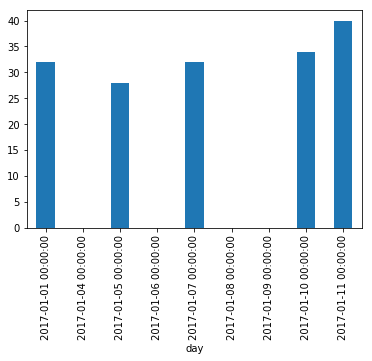

In [110]:
%matplotlib inline
df.temperature.plot.bar()

Llene todos los NaN con un valor en específico. En este caso, se están llenando con ceros.

In [111]:
new_df = df.fillna(0)
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,0.0,9.0,Sunny
2017-01-05,28.0,0.0,Snow
2017-01-06,0.0,7.0,0
2017-01-07,32.0,0.0,Rain
2017-01-08,0.0,0.0,Sunny
2017-01-09,0.0,0.0,0
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


Tal vez llenar con ceros no sea lo mejor, por lo que utilizando los siguientes comandos, especificamos como llenar dichos datos faltantes columna a columna

In [112]:
new_df = df.fillna({
        'temperature': 0,
        'windspeed': 0,
        'event': 'No Event'
    })
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,0.0,9.0,Sunny
2017-01-05,28.0,0.0,Snow
2017-01-06,0.0,7.0,No Event
2017-01-07,32.0,0.0,Rain
2017-01-08,0.0,0.0,Sunny
2017-01-09,0.0,0.0,No Event
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


Tal vez es mejor poner en esas casillas faltantes la lectura del día previo (como si estuvieras utilizando una escoba y estuvieras barriendo los datos hacia el futuro):

In [113]:
new_df = df.fillna(method="ffill") # forward fill
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,32.0,9.0,Sunny
2017-01-05,28.0,9.0,Snow
2017-01-06,28.0,7.0,Snow
2017-01-07,32.0,7.0,Rain
2017-01-08,32.0,7.0,Sunny
2017-01-09,32.0,7.0,Sunny
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


Tal vez es mejor poner en esas casillas faltantes la lectura del día siguiente (como si estuvieras utilizando una escoba y estuvieras barriendo los datos hacia el pasado):

In [114]:
new_df = df.fillna(method="bfill") # backward fill
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,28.0,9.0,Sunny
2017-01-05,28.0,7.0,Snow
2017-01-06,32.0,7.0,Rain
2017-01-07,32.0,8.0,Rain
2017-01-08,34.0,8.0,Sunny
2017-01-09,34.0,8.0,Cloudy
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


Con el siguiente comando traigo la información faltante de la columna de la derecha hacia la columna de la izquierda.

In [115]:
new_df = df.fillna(method="bfill", axis="columns") # axis is either "index" or "columns"
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32,6,Rain
2017-01-04,9,9,Sunny
2017-01-05,28,Snow,Snow
2017-01-06,7,7,NaN
2017-01-07,32,Rain,Rain
2017-01-08,Sunny,Sunny,Sunny
2017-01-09,NaN,NaN,NaN
2017-01-10,34,8,Cloudy
2017-01-11,40,12,Sunny


Y aquí, cuando propago la información de los días anteriores o posteriores, lo hago máximo una vez:

In [116]:
new_df = df.fillna(method="ffill",limit=1)
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,32.0,9.0,Sunny
2017-01-05,28.0,9.0,Snow
2017-01-06,28.0,7.0,Snow
2017-01-07,32.0,7.0,Rain
2017-01-08,32.0,NaN,Sunny
2017-01-09,NaN,NaN,Sunny
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


En ocasiones es conveniente interpolar los datos numéricos faltantes:

In [117]:
new_df = df.interpolate()
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.000000,6.00,Rain
2017-01-04,30.000000,9.00,Sunny
2017-01-05,28.000000,8.00,Snow
2017-01-06,30.000000,7.00,NaN
2017-01-07,32.000000,7.25,Rain
2017-01-08,32.666667,7.50,Sunny
2017-01-09,33.333333,7.75,NaN
2017-01-10,34.000000,8.00,Cloudy
2017-01-11,40.000000,12.00,Sunny


Sin embargo, si se mira la tabla, dicha interpolación lineal no está teniendo en cuenta el tiempo de la medición. Aquí `time` interpola linealmente pero teniendo en cuenta el tiempo.

In [118]:
new_df = df.interpolate(method="time") 
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.000000,6.00,Rain
2017-01-04,29.000000,9.00,Sunny
2017-01-05,28.000000,8.00,Snow
2017-01-06,30.000000,7.00,NaN
2017-01-07,32.000000,7.25,Rain
2017-01-08,32.666667,7.50,Sunny
2017-01-09,33.333333,7.75,NaN
2017-01-10,34.000000,8.00,Cloudy
2017-01-11,40.000000,12.00,Sunny


Note que la temperatura en 2017-01-04 es 29 y no el 30 de la interpolación lineal.

Existen otros métodos para interpolación: `quadratic`, `piecewise_polynomial`, `cubic`, etc. Escriba en google: "dataframe interpolate" para ver la documentación.

A veces no se quiere interpolar, sino simplemente, eliminar todas aquellas filas que contengan datos faltantes:

In [119]:
new_df = df.dropna()
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


O solo aquellas filas que contengan datos faltantes en todas las columnas

In [120]:
new_df = df.dropna(how='all')
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,NaN,9.0,Sunny
2017-01-05,28.0,NaN,Snow
2017-01-06,NaN,7.0,NaN
2017-01-07,32.0,NaN,Rain
2017-01-08,NaN,NaN,Sunny
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


Si quiero conservar aquellas filas que tengan datos en al menos dos columnas, hago los siguiente:

In [121]:
new_df = df.dropna(thresh=2)
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,NaN,9.0,Sunny
2017-01-05,28.0,NaN,Snow
2017-01-07,32.0,NaN,Rain
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


Si en vez de borrar filas, quiero insertar las fechas faltantes; eso se hace así:

In [122]:
dt = pd.date_range("01-01-2017","01-11-2017")  # rango de fechas
idx = pd.DatetimeIndex(dt)
df.reindex(idx)

,temperature,windspeed,event
2017-01-01,32.0,6.0,Rain
2017-01-02,NaN,NaN,NaN
2017-01-03,NaN,NaN,NaN
2017-01-04,NaN,9.0,Sunny
2017-01-05,28.0,NaN,Snow
2017-01-06,NaN,7.0,NaN
2017-01-07,32.0,NaN,Rain
2017-01-08,NaN,NaN,Sunny
2017-01-09,NaN,NaN,NaN
2017-01-10,34.0,8.0,Cloudy


### Haciendo cálculos con datos faltantes:

Cuando se hace un cálculo se saltan los valores faltantes:

In [123]:
df['temperature'].mean()

33.2

Excepto si se utiliza la bandera `skipna=False`:

In [124]:
df['temperature'].mean(skipna=False)

nan

# 6. Reemplazando una información por otra con `df.replace()`

In [125]:
import numpy as np   # para el np.nan
df = pd.read_csv("datos/weather_data_para_reemplazar1.csv")
df

,day,temperature,windspeed,event
0,1/1/2017,32,6,Rain
1,1/2/2017,-99999,7,Sunny
2,1/3/2017,28,-99999,Snow
3,1/4/2017,-99999,7,0
4,1/5/2017,32,-99999,Rain
5,1/6/2017,31,2,Sunny
6,1/6/2017,34,5,0


Donde encuentre -99999, ponga un NaN:

In [126]:
new_df = df.replace(-99999, value=np.NaN)
new_df

,day,temperature,windspeed,event
0,1/1/2017,32.0,6.0,Rain
1,1/2/2017,NaN,7.0,Sunny
2,1/3/2017,28.0,NaN,Snow
3,1/4/2017,NaN,7.0,0
4,1/5/2017,32.0,NaN,Rain
5,1/6/2017,31.0,2.0,Sunny
6,1/6/2017,34.0,5.0,0


Donde encuentre -99999 ó -88888, ponga un cero:

In [127]:
new_df = df.replace(to_replace=[-99999, -88888], value=0)
new_df

,day,temperature,windspeed,event
0,1/1/2017,32,6,Rain
1,1/2/2017,0,7,Sunny
2,1/3/2017,28,0,Snow
3,1/4/2017,0,7,0
4,1/5/2017,32,0,Rain
5,1/6/2017,31,2,Sunny
6,1/6/2017,34,5,0


Reemplazando en cada columna por aparte. Se especifican los valores a reemplazar y ponemos en este caso un NaN

In [128]:
new_df = df.replace({
        'temperature': -99999,
        'windspeed': -99999,
        'event': '0'
    }, np.nan)
new_df

,day,temperature,windspeed,event
0,1/1/2017,32.0,6.0,Rain
1,1/2/2017,NaN,7.0,Sunny
2,1/3/2017,28.0,NaN,Snow
3,1/4/2017,NaN,7.0,NaN
4,1/5/2017,32.0,NaN,Rain
5,1/6/2017,31.0,2.0,Sunny
6,1/6/2017,34.0,5.0,NaN


Aquí reemplazaremos los -99999 por un NaN y los "no event" por "Sunny":

In [129]:
new_df = df.replace({
        -99999: np.nan,
        'no event': 'Sunny',
    })
new_df

,day,temperature,windspeed,event
0,1/1/2017,32.0,6.0,Rain
1,1/2/2017,NaN,7.0,Sunny
2,1/3/2017,28.0,NaN,Snow
3,1/4/2017,NaN,7.0,0
4,1/5/2017,32.0,NaN,Rain
5,1/6/2017,31.0,2.0,Sunny
6,1/6/2017,34.0,5.0,0


Utilizamos *expresiones regulares* para reemplazar. Las expresiones regulares se utilizan para encontrar patrones en las cadenas a analizar.

In [130]:
df = pd.read_csv("datos/weather_data_para_reemplazar2.csv")
df

,day,temperature,windspeed,event
0,1/1/2017,32 C,6 km/h,Rain
1,1/2/2017,-99999,7,Sunny
2,1/3/2017,28,-99999,Snow
3,1/4/2017,-99999,7,0
4,1/5/2017,32 C,-99999,Rain
5,1/6/2017,31,2,Sunny
6,1/6/2017,34 C,5 km/h,0


Cuando se encuentre una letra `A-Z` o `a-z` en la columna `temperature` o cuando se encuentre un `a-z` o un `/` en la columna `windspeed`, reemplace estos caracteres por la cadena vacía '':

In [131]:
# when windspeed is 6 mph, 7 mph etc. & temperature is 32 F, 28 F etc.
new_df = df.replace({'temperature': '[A-Za-z]',
                     'windspeed': '[a-z/]'},'', regex=True) 
new_df

,day,temperature,windspeed,event
0,1/1/2017,32,6,Rain
1,1/2/2017,-99999,7,Sunny
2,1/3/2017,28,-99999,Snow
3,1/4/2017,-99999,7,0
4,1/5/2017,32,-99999,Rain
5,1/6/2017,31,2,Sunny
6,1/6/2017,34,5,0


Creemos una nueva lista:

In [132]:
df = pd.DataFrame({
    'score': ['exceptional','average', 'good', 'poor', 'average', 'exceptional'],
    'student': ['rob', 'maya', 'parthiv', 'tom', 'julian', 'erica']
})
df

,score,student
0,exceptional,rob
1,average,maya
2,good,parthiv
3,poor,tom
4,average,julian
5,exceptional,erica


Y en esa nueva lista, reemplace una lista de valores por otra lista de valores:

In [133]:
new_df = df.replace(['poor', 'average', 'good', 'exceptional'], [1,2,3,4])
new_df

,score,student
0,4,rob
1,2,maya
2,3,parthiv
3,1,tom
4,2,julian
5,4,erica


# 7. Agrupando datos

## Ejemplo 7.1

In [134]:
df = pd.read_csv("datos/agrupando_weather_by_cities.csv")
df

,day,city,temperature,windspeed,event
0,1/1/2017,new york,32,6,Rain
1,1/1/2017,paris,45,20,Sunny
2,1/1/2017,mumbai,90,5,Sunny
3,1/2/2017,new york,36,7,Sunny
4,1/3/2017,paris,54,8,Cloudy
5,1/3/2017,new york,28,12,Snow
6,1/5/2017,paris,40,13,Cloudy
7,1/3/2017,mumbai,87,15,NaN
8,1/4/2017,new york,33,7,Sunny
9,1/4/2017,mumbai,92,5,Rain


Se agrupan los datos por ciudades:

In [135]:
g = df.groupby("city")
g

El objeto **DataFrameGroupBy** es algo así como:

In [136]:
for city, data in g:
    print("city:", city)
    print("data:\n", data)    
    print("\n")

city: mumbai
data:
          day    city  temperature  windspeed  event
2   1/1/2017  mumbai           90          5  Sunny
7   1/3/2017  mumbai           87         15    NaN
9   1/4/2017  mumbai           92          5   Rain
11  1/2/2017  mumbai           85         12    Fog


city: new york
data:
         day      city  temperature  windspeed  event
0  1/1/2017  new york           32          6   Rain
3  1/2/2017  new york           36          7  Sunny
5  1/3/2017  new york           28         12   Snow
8  1/4/2017  new york           33          7  Sunny


city: paris
data:
          day   city  temperature  windspeed   event
1   1/1/2017  paris           45         20   Sunny
4   1/3/2017  paris           54          8  Cloudy
6   1/5/2017  paris           40         13  Cloudy
10  1/2/2017  paris           50         13  Cloudy
12  1/4/2017  paris           42         10  Cloudy




Miremos los datos de un grupo en específico:

In [137]:
g.get_group('mumbai')

,day,city,temperature,windspeed,event
2,1/1/2017,mumbai,90,5,Sunny
7,1/3/2017,mumbai,87,15,NaN
9,1/4/2017,mumbai,92,5,Rain
11,1/2/2017,mumbai,85,12,Fog


Y ahora unos cuantos estadísticos de todos los grugos:

In [138]:
g.max() # máximos para cada ciudad

,day,temperature,windspeed
city,,,
mumbai,1/4/2017,92,15
new york,1/4/2017,36,12
paris,1/5/2017,54,20


In [139]:
g.mean() # promedios para cada ciudad

,temperature,windspeed
city,,
mumbai,88.50,9.25
new york,32.25,8.00
paris,46.20,12.80


In [140]:
g.min() # mínimos para cada ciudad

,day,temperature,windspeed
city,,,
mumbai,1/1/2017,85,5
new york,1/1/2017,28,6
paris,1/1/2017,40,8


Ahora hagamos una tabla con algunas estadísticas:

In [141]:
g.describe().T

city                  mumbai   new york      paris
temperature count   4.000000   4.000000   5.000000
            mean   88.500000  32.250000  46.200000
            std     3.109126   3.304038   5.761944
            min    85.000000  28.000000  40.000000
            25%    86.500000  31.000000  42.000000
            50%    88.500000  32.500000  45.000000
            75%    90.500000  33.750000  50.000000
            max    92.000000  36.000000  54.000000
windspeed   count   4.000000   4.000000   5.000000
            mean    9.250000   8.000000  12.800000
            std     5.057997   2.708013   4.549725
            min     5.000000   6.000000   8.000000
            25%     5.000000   6.750000  10.000000
            50%     8.500000   7.000000  13.000000
            75%    12.750000   8.250000  13.000000
            max    15.000000  12.000000  20.000000

Cuantas muestras tiene cada grupo:

In [142]:
g.size()

city
mumbai      4
new york    4
paris       5
dtype: int64

Cuente el número de datos no faltantes:

In [143]:
g.count()

,day,temperature,windspeed,event
city,,,,
mumbai,4,4,4,3
new york,4,4,4,4
paris,5,5,5,5


Grafiquemos cada uno de los grupos:

city
mumbai      AxesSubplot(0.125,0.125;0.775x0.755)
new york    AxesSubplot(0.125,0.125;0.775x0.755)
paris       AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

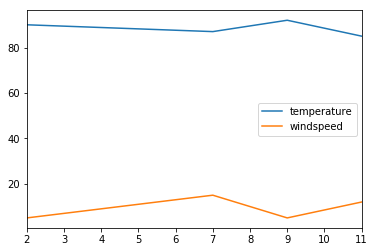

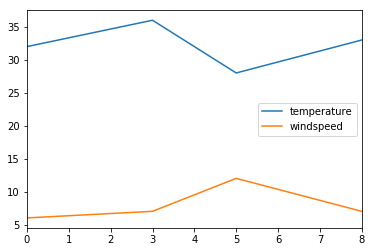

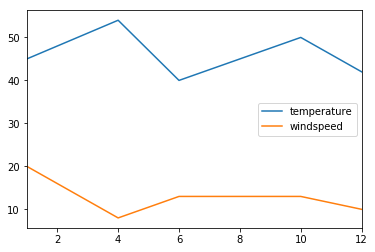

In [144]:
%matplotlib inline
g.plot()

Vamos ahora a grupar las ciudades utilizando funciones definidas por el usuario.

En particular se quieren crear tres grupos:
* Días cuando la temperatura estaba entre 80 y 90
* Días cuando la temperatura estaba entre 50 y 60
* Días con otras temperaturas

In [145]:
def grouper(df, idx, col):
    if 80 <= df[col].loc[idx] <= 90:
        return 'Temperatura entre 80-90'
    elif 50 <= df[col].loc[idx] <= 60:
        return 'Temperatura entre 50-60'
    else:
        return 'Otras temperaturas'

In [146]:
g = df.groupby(lambda x: grouper(df, x, 'temperature'))
g

In [147]:
for key, d in g:
    print("Llave de agrupamiento: {}".format(key))
    print(d)
    print('\n')

Llave de agrupamiento: Otras temperaturas
         day      city  temperature  windspeed   event
0   1/1/2017  new york           32          6    Rain
1   1/1/2017     paris           45         20   Sunny
3   1/2/2017  new york           36          7   Sunny
5   1/3/2017  new york           28         12    Snow
6   1/5/2017     paris           40         13  Cloudy
8   1/4/2017  new york           33          7   Sunny
9   1/4/2017    mumbai           92          5    Rain
12  1/4/2017     paris           42         10  Cloudy


Llave de agrupamiento: Temperatura entre 50-60
         day   city  temperature  windspeed   event
4   1/3/2017  paris           54          8  Cloudy
10  1/2/2017  paris           50         13  Cloudy


Llave de agrupamiento: Temperatura entre 80-90
         day    city  temperature  windspeed  event
2   1/1/2017  mumbai           90          5  Sunny
7   1/3/2017  mumbai           87         15    NaN
11  1/2/2017  mumbai           85         12    Fog



Y de nuevo calculemos los máximos para cada grupo

In [148]:
g.max() # máximos para cada ciudad

,day,city,temperature,windspeed
Otras temperaturas,1/5/2017,paris,92,20
Temperatura entre 50-60,1/3/2017,paris,54,13
Temperatura entre 80-90,1/3/2017,mumbai,90,15


## Ejemplo 7.2

Cargamos una tabla separada no por comas sino por tabuladores:

In [149]:
df = pd.read_csv('datos/gapminder.tsv', delimiter='\t')
df

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
5,Afghanistan,Asia,1977,38.438,14880372,786.113360
6,Afghanistan,Asia,1982,39.854,12881816,978.011439
7,Afghanistan,Asia,1987,40.822,13867957,852.395945
8,Afghanistan,Asia,1992,41.674,16317921,649.341395
9,Afghanistan,Asia,1997,41.763,22227415,635.341351


El comando `.groupby()` crea un tipo especial de `DataFrame`, en el cual se almacena una partición de los datos, en este caso año por año:

In [150]:
df.groupby('year')

De ese `DataFrameGroupBy` extraiga la columna `lifeExp`:

In [151]:
df.groupby('year')['lifeExp']

Podemos calcular algunas estadísticas del `GroupBy`:

In [152]:
df.groupby('continent')['lifeExp'].describe()

,count,mean,std,min,25%,50%,75%,max
continent,,,,,,,,
Africa,624.0,48.865330,9.150210,23.599,42.37250,47.7920,54.41150,76.442
Americas,300.0,64.658737,9.345088,37.579,58.41000,67.0480,71.69950,80.653
Asia,396.0,60.064903,11.864532,28.801,51.42625,61.7915,69.50525,82.603
Europe,360.0,71.903686,5.433178,43.585,69.57000,72.2410,75.45050,81.757
Oceania,24.0,74.326208,3.795611,69.120,71.20500,73.6650,77.55250,81.235


Y calcúlele la media año por año, es decir en cada conjunto formado:

In [153]:
# quitando el "groupby('year')" se hubiera calculado la media de la
# columna 'lifeExp'; sin embargo, al aplicar el "groupby('year')", 
# dicho promedio se hace para cada grupo de la partición
df.groupby('year')['lifeExp'].mean()

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

O incluso de dos columnas al tiempo:

In [154]:
le_gpd = df.groupby('year')[['lifeExp', 'gdpPercap']].mean()
le_gpd

,lifeExp,gdpPercap
year,,
1952,49.057620,3725.276046
1957,51.507401,4299.408345
1962,53.609249,4725.812342
1967,55.678290,5483.653047
1972,57.647386,6770.082815
1977,59.570157,7313.166421
1982,61.533197,7518.901673
1987,63.212613,7900.920218
1992,64.160338,8158.608521


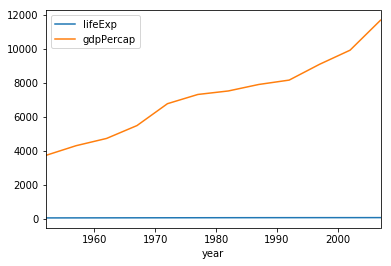

In [155]:
le_gpd.plot()

Analicemos los datos de 1952:

In [156]:
y1952 = df.loc[df['year'] == 1952, :]
y1952.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
12,Albania,Europe,1952,55.230,1282697,1601.056136
24,Algeria,Africa,1952,43.077,9279525,2449.008185
36,Angola,Africa,1952,30.015,4232095,3520.610273
48,Argentina,Americas,1952,62.485,17876956,5911.315053


Agrupe ahora los datos en dos niveles: `year` y `continent` y calcúle la media para las columnas indicadas:

In [157]:
gbm = df.groupby(['year', 'continent'])[['lifeExp', 'gdpPercap']].mean()
gbm

lifeExp     gdpPercap
year continent                         
1952 Africa     39.135500   1252.572466
     Americas   53.279840   4079.062552
     Asia       46.314394   5195.484004
     Europe     64.408500   5661.057435
     Oceania    69.255000  10298.085650
1957 Africa     41.266346   1385.236062
     Americas   55.960280   4616.043733
     Asia       49.318544   5787.732940
     Europe     66.703067   6963.012816
     Oceania    70.295000  11598.522455
1962 Africa     43.319442   1598.078825
     Americas   58.398760   4901.541870
     Asia       51.563223   5729.369625
     Europe     68.539233   8365.486814
     Oceania    71.085000  12696.452430
1967 Africa     45.334538   2050.363801
     Americas   60.410920   5668.253496
     Asia       54.663640   5971.173374
     Europe     69.737600  10143.823757
     Oceania    71.310000  14495.021790
1972 Africa     47.450942   2339.615674
     Americas   62.394920   6491.334139
     Asia       57.319269   8187.468699
     Europe     70.775033  12479.575246
     Oceania    71.910000  16417.333380
1977 Africa     49.580423   2585.938508
     Americas   64.391560   7352.007126
     Asia       59.610556   7791.314020
     Europe     71.937767  14283.979110
     Oceania    72.855000  17283.957605
1982 Africa     51.592865   2481.592960
     Americas   66.228840   7506.737088
     Asia       62.617939   7434.135157
     Europe     72.806400  15617.896551
     Oceania    74.290000  18554.709840
1987 Africa     53.344788   2282.668991
     Americas   68.090720   7793.400261
     Asia       64.851182   7608.226508
     Europe     73.642167  17214.310727
     Oceania    75.320000  20448.040160
1992 Africa     53.629577   2281.810333
     Americas   69.568360   8044.934406
     Asia       66.537212   8639.690248
     Europe     74.440100  17061.568084
     Oceania    76.945000  20894.045885
1997 Africa     53.598269   2378.759555
     Americas   71.150480   8889.300863
     Asia       68.020515   9834.093295
     Europe     75.505167  19076.781802
     Oceania    78.190000  24024.175170
2002 Africa     53.325231   2599.385159
     Americas   72.422040   9287.677107
     Asia       69.233879  10174.090397
     Europe     76.700600  21711.732422
     Oceania    79.740000  26938.778040
2007 Africa     54.806038   3089.032605
     Americas   73.608120  11003.031625
     Asia       70.728485  12473.026870
     Europe     77.648600  25054.481636
     Oceania    80.719500  29810.188275

Sencillamente ¡super poderoso!

Otros métodos que se pueden usar son:
- count
- size
- mean
- std
- min
- quantile(q=0.25)
- max
- sum
- var
- sem
- describe
- first
- last
- nth

In [158]:
type(gbm)

pandas.core.frame.DataFrame

Y si quiero aplanar el `DataFrame` anterior puedo hacer:

In [159]:
gbm.reset_index()

,year,continent,lifeExp,gdpPercap
0,1952,Africa,39.135500,1252.572466
1,1952,Americas,53.279840,4079.062552
2,1952,Asia,46.314394,5195.484004
3,1952,Europe,64.408500,5661.057435
4,1952,Oceania,69.255000,10298.085650
5,1957,Africa,41.266346,1385.236062
6,1957,Americas,55.960280,4616.043733
7,1957,Asia,49.318544,5787.732940
8,1957,Europe,66.703067,6963.012816
9,1957,Oceania,70.295000,11598.522455


Lo siguientes cuatro comandos hacen lo mismo:

In [160]:
import numpy as np
df.groupby('continent')['lifeExp'].mean()

continent
Africa      48.865330
Americas    64.658737
Asia        60.064903
Europe      71.903686
Oceania     74.326208
Name: lifeExp, dtype: float64

In [161]:
df.groupby('continent')['lifeExp'].aggregate(np.mean)

continent
Africa      48.865330
Americas    64.658737
Asia        60.064903
Europe      71.903686
Oceania     74.326208
Name: lifeExp, dtype: float64

In [162]:
df.groupby('continent')['lifeExp'].agg(np.mean)

continent
Africa      48.865330
Americas    64.658737
Asia        60.064903
Europe      71.903686
Oceania     74.326208
Name: lifeExp, dtype: float64

In [163]:
# Observe que puedo crear mi propia función:
def mi_media(values):
    return np.sum(values)/len(values)

df.groupby('continent')['lifeExp'].agg(mi_media)

continent
Africa      48.865330
Americas    64.658737
Asia        60.064903
Europe      71.903686
Oceania     74.326208
Name: lifeExp, dtype: float64

Incluso, puedo aplicar varias funciones al mismo tiempo:

In [164]:
df.groupby('year')['lifeExp'].agg([
    np.count_nonzero,
    np.mean,
    np.std
])

,count_nonzero,mean,std
year,,,
1952,142.0,49.057620,12.225956
1957,142.0,51.507401,12.231286
1962,142.0,53.609249,12.097245
1967,142.0,55.678290,11.718858
1972,142.0,57.647386,11.381953
1977,142.0,59.570157,11.227229
1982,142.0,61.533197,10.770618
1987,142.0,63.212613,10.556285
1992,142.0,64.160338,11.227380


Pero como no me gusta el nombre de la columna, la renombro con el método [`DataFrame.rename()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html):

In [165]:
df.groupby('year')['lifeExp'].agg([
    np.count_nonzero,
    np.mean,
    np.std
]).rename(columns={
    'count_nonzero': 'count',
    'mean': 'average'})

,count,average,std
year,,,
1952,142.0,49.057620,12.225956
1957,142.0,51.507401,12.231286
1962,142.0,53.609249,12.097245
1967,142.0,55.678290,11.718858
1972,142.0,57.647386,11.381953
1977,142.0,59.570157,11.227229
1982,142.0,61.533197,10.770618
1987,142.0,63.212613,10.556285
1992,142.0,64.160338,11.227380


In [166]:
gbm

lifeExp     gdpPercap
year continent                         
1952 Africa     39.135500   1252.572466
     Americas   53.279840   4079.062552
     Asia       46.314394   5195.484004
     Europe     64.408500   5661.057435
     Oceania    69.255000  10298.085650
1957 Africa     41.266346   1385.236062
     Americas   55.960280   4616.043733
     Asia       49.318544   5787.732940
     Europe     66.703067   6963.012816
     Oceania    70.295000  11598.522455
1962 Africa     43.319442   1598.078825
     Americas   58.398760   4901.541870
     Asia       51.563223   5729.369625
     Europe     68.539233   8365.486814
     Oceania    71.085000  12696.452430
1967 Africa     45.334538   2050.363801
     Americas   60.410920   5668.253496
     Asia       54.663640   5971.173374
     Europe     69.737600  10143.823757
     Oceania    71.310000  14495.021790
1972 Africa     47.450942   2339.615674
     Americas   62.394920   6491.334139
     Asia       57.319269   8187.468699
     Europe     70.775033  12479.575246
     Oceania    71.910000  16417.333380
1977 Africa     49.580423   2585.938508
     Americas   64.391560   7352.007126
     Asia       59.610556   7791.314020
     Europe     71.937767  14283.979110
     Oceania    72.855000  17283.957605
1982 Africa     51.592865   2481.592960
     Americas   66.228840   7506.737088
     Asia       62.617939   7434.135157
     Europe     72.806400  15617.896551
     Oceania    74.290000  18554.709840
1987 Africa     53.344788   2282.668991
     Americas   68.090720   7793.400261
     Asia       64.851182   7608.226508
     Europe     73.642167  17214.310727
     Oceania    75.320000  20448.040160
1992 Africa     53.629577   2281.810333
     Americas   69.568360   8044.934406
     Asia       66.537212   8639.690248
     Europe     74.440100  17061.568084
     Oceania    76.945000  20894.045885
1997 Africa     53.598269   2378.759555
     Americas   71.150480   8889.300863
     Asia       68.020515   9834.093295
     Europe     75.505167  19076.781802
     Oceania    78.190000  24024.175170
2002 Africa     53.325231   2599.385159
     Americas   72.422040   9287.677107
     Asia       69.233879  10174.090397
     Europe     76.700600  21711.732422
     Oceania    79.740000  26938.778040
2007 Africa     54.806038   3089.032605
     Americas   73.608120  11003.031625
     Asia       70.728485  12473.026870
     Europe     77.648600  25054.481636
     Oceania    80.719500  29810.188275

El método `.unique()` permite decir cuales son los valores únicos. y el método `.nunique()` los cuenta. En este caso, dice el número de países por continente:

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.SeriesGroupBy.nunique.html

In [167]:
df.groupby('continent')['country'].unique() 

continent
Africa      [Algeria, Angola, Benin, Botswana, Burkina Fas...
Americas    [Argentina, Bolivia, Brazil, Canada, Chile, Co...
Asia        [Afghanistan, Bahrain, Bangladesh, Cambodia, C...
Europe      [Albania, Austria, Belgium, Bosnia and Herzego...
Oceania                              [Australia, New Zealand]
Name: country, dtype: object

In [168]:
df.groupby('continent')['country'].nunique()

continent
Africa      52
Americas    25
Asia        33
Europe      30
Oceania      2
Name: country, dtype: int64

# 8. Concatenando `DataFrame`s con `pd.concat()`

## Ejemplo inicial

Iniciemos con un ejemplo que nos dejará muy sorprendidos:

In [169]:
# Leamos la lista de los municipios de Colombia por población:
df = pd.read_html('https://es.wikipedia.org/wiki/Anexo:Municipios_de_Colombia_por_poblaci%C3%B3n')

In [170]:
# Imprimamos el resultado
df

[    N.°      Municipio        Departamento Población cabecera Población resto  \
 0     1         Bogotá        Cundinamarca          8 264 029          17 001   
 1     2       Medellín           Antioquia          2 522 081          27 456   
 2     3           Cali     Valle del Cauca          2 434 110          36 637   
 3     4   Barranquilla           Atlántico          1 232 226           4 263   
 4     5      Cartagena             Bolívar          1 006 323          40 998   
 5     6        Soledad           Atlántico            682 910             576   
 6     7         Cúcuta  Norte de Santander            652 320          22 688   
 7     8         Ibagué              Tolima            543 564          31 009   
 8     9         Soacha        Cundinamarca            550 054           6 214   
 9    10    Bucaramanga           Santander            522 439           6 255   
 10   11  Villavicencio                Meta            503 414          24 254   
 11   12    Sant

Aquí observamos que el resultado es una lista de `Dataframe`s:

In [171]:
type(df)

list

In [172]:
len(df)

4

In [173]:
df[0]

,N.°,Municipio,Departamento,Población cabecera,Población resto,Población Total
0,1,Bogotá,Cundinamarca,8 264 029,17 001,8 281 030
1,2,Medellín,Antioquia,2 522 081,27 456,2 549 537
2,3,Cali,Valle del Cauca,2 434 110,36 637,2 470 747
3,4,Barranquilla,Atlántico,1 232 226,4 263,1 236 489
4,5,Cartagena,Bolívar,1 006 323,40 998,1 047 321
5,6,Soledad,Atlántico,682 910,576,683 486
6,7,Cúcuta,Norte de Santander,652 320,22 688,675 008
7,8,Ibagué,Tolima,543 564,31 009,574 573
8,9,Soacha,Cundinamarca,550 054,6 214,556 268
9,10,Bucaramanga,Santander,522 439,6 255,528 694


In [174]:
df[1]

,N.°,Municipio,Departamento,Población cabecera,Población resto,Población Total
0,35,Uribia,La Guajira,14 088,184 802,198 890
1,36,Barrancabermeja,Santander,173 187,18 153,191 340
2,37,Florencia,Caquetá,163 112,21 419,184 531
3,38,Turbo,Antioquia,70 897,105 916,176 813
4,39,Maicao,La Guajira,114 400,52 203,166 603
5,40,Piedecuesta,Santander,134 588,28 740,163 328
6,41,Yopal,Casanare,137 198,15 461,152 659
7,42,Ipiales,Nariño,112 350,39 183,151 533
8,43,Fusagasugá,Cundinamarca,117 019,28 020,145 039
9,44,Facatativá,Cundinamarca,128 531,13 231,141 762


In [175]:
df[2]

,N.°,Municipio,Departamento,Población cabecera,Población resto,Población Total
0,66,Santander de Quilichao,Cauca,58 311,41 043,99 354
1,67,Villa del Rosario,Norte de Santander,92 769,4 172,96 941
2,68,Aguachica,Cesar,84 830,11 837,96 667
3,69,Garzón,Huila,46 371,49 925,96 296
4,70,Cereté,Córdoba,54 923,39 432,94 355
5,71,Arauca,Arauca,81 245,12 016,93 261
6,72,Mosquera,Cundinamarca,87 855,3 427,91 282
7,73,Sahagún,Córdoba,48 978,41 509,90 487
8,74,Montelíbano,Córdoba,70 290,18 384,88 674
9,75,Candelaria,Valle del Cauca,24 183,62 394,86 577


In [176]:
df[3]

,N.°,Municipio,Departamento,Población cabecera,Población resto,Población Total
0,133,Cimitarra,Santander,20 109,29 484,49 593
1,134,María La Baja,Bolívar,22 565,26 897,49 462
2,135,Agustín Codazzi,Cesar,38 463,10 770,49 233
3,136,Samaniego,Nariño,18 499,30 679,49 178
4,137,Yarumal,Antioquia,32 044,17 065,49 109
5,138,El Carmen de Viboral,Antioquia,33 278,15 798,49 076
6,139,Saravena,Arauca,33 361,15 286,48 647
7,140,El Tambo,Cauca,7 193,40 901,48 094
8,141,Tarazá,Antioquia,31 075,16 550,47 625
9,142,Galapa,Atlántico,43 211,4 330,47 541


Concatenemos todas las listas y la imprimimos:

In [177]:
municipios = pd.concat(df, axis=0, sort=False, ignore_index=True)
municipios

,N.°,Municipio,Departamento,Población cabecera,Población resto,Población Total
0,1,Bogotá,Cundinamarca,8 264 029,17 001,8 281 030
1,2,Medellín,Antioquia,2 522 081,27 456,2 549 537
2,3,Cali,Valle del Cauca,2 434 110,36 637,2 470 747
3,4,Barranquilla,Atlántico,1 232 226,4 263,1 236 489
4,5,Cartagena,Bolívar,1 006 323,40 998,1 047 321
5,6,Soledad,Atlántico,682 910,576,683 486
6,7,Cúcuta,Norte de Santander,652 320,22 688,675 008
7,8,Ibagué,Tolima,543 564,31 009,574 573
8,9,Soacha,Cundinamarca,550 054,6 214,556 268
9,10,Bucaramanga,Santander,522 439,6 255,528 694


Y ahora muestro la lista para los municipios del Departamento de Caldas:

In [178]:
mun_caldas = municipios[municipios['Departamento'] == 'Caldas']
mun_caldas.index = np.arange(27)+1
mun_caldas

,N.°,Municipio,Departamento,Población cabecera,Población resto,Población Total
1,19,Manizales,Caldas,373 862,27 586,401 448
2,83,La Dorada,Caldas,70 231,8 309,78 540
3,100,Riosucio,Caldas,20 658,43 935,64 593
4,107,Villamaría,Caldas,50 835,9 889,60 724
5,130,Chinchiná,Caldas,45 917,4 756,50 673
6,226,Anserma,Caldas,22 032,11 240,33 272
7,246,Neira,Caldas,17 132,14 267,31 399
8,281,Supía,Caldas,13 463,14 026,27 489
9,298,Pensilvania,Caldas,8 580,17 762,26 342
10,306,Samaná,Caldas,5 192,20 606,25 798


## Otro ejemplo:

Definimos los `DataFrame`s:

In [179]:
india_weather = pd.DataFrame({
    "city": ["mumbai","delhi","banglore"],
    "temperature": [32,45,30],
    "humidity": [80, 60, 78]
})
india_weather

,city,temperature,humidity
0,mumbai,32,80
1,delhi,45,60
2,banglore,30,78


In [180]:
us_weather = pd.DataFrame({
    "city": ["new york","chicago","orlando"],
    "temperature": [21,14,35],
    "humidity": [68, 65, 75]
})
us_weather

,city,temperature,humidity
0,new york,21,68
1,chicago,14,65
2,orlando,35,75


Ahora concatenamos ambos `DataFrames`:


In [181]:
df = pd.concat([india_weather, us_weather])
df

,city,temperature,humidity
0,mumbai,32,80
1,delhi,45,60
2,banglore,30,78
0,new york,21,68
1,chicago,14,65
2,orlando,35,75


Tenga en cuenta que así mismo se podría agregar una fila al `DataFrame`.

Listemos ahora las filas con índice 0:

In [182]:
df.loc[0]

,city,temperature,humidity
0,mumbai,32,80
0,new york,21,68


In [183]:
df.iloc[0]

city           mumbai
temperature        32
humidity           80
Name: 0, dtype: object

Observe los índices anteriores son los mismos que en la base original.

Si queremos ignorar los índices, debemos hacer lo siguiente:

In [184]:
df = pd.concat([india_weather, us_weather], ignore_index=True)
df

,city,temperature,humidity
0,mumbai,32,80
1,delhi,45,60
2,banglore,30,78
3,new york,21,68
4,chicago,14,65
5,orlando,35,75


Si queremos colocar una llave para acceder a los `DataFrames`, pero "ya agrupados", hacemos lo siguiente:

In [185]:
df = pd.concat([india_weather, us_weather], keys=["india", "us"])
df

city  temperature  humidity
india 0    mumbai           32        80
      1     delhi           45        60
      2  banglore           30        78
us    0  new york           21        68
      1   chicago           14        65
      2   orlando           35        75

De modo que:

In [186]:
df.loc["us"]

,city,temperature,humidity
0,new york,21,68
1,chicago,14,65
2,orlando,35,75


In [187]:
df.loc["india"]

,city,temperature,humidity
0,mumbai,32,80
1,delhi,45,60
2,banglore,30,78


## Concatenando con el DataFrames teniendo en cuenta el mismo index

In [188]:
temperature_df = pd.DataFrame({
    "city": ["mumbai","delhi","banglore"],
    "temperature": [32,45,30],
}, index=[0,1,2])
temperature_df

,city,temperature
0,mumbai,32
1,delhi,45
2,banglore,30


Observe que el siguiente `DataFrame` tiene dos filas y el orden de las ciudades es diferentes:

In [189]:
windspeed_df = pd.DataFrame({
    "city": ["delhi","mumbai"],
    "windspeed": [7,12],
}, index=[1,0])  # 1=index de delhi y 0=index de mumbai en temperature_df
windspeed_df

,city,windspeed
1,delhi,7
0,mumbai,12


Y los DataFrames se concatenan haciendo coincidir los índices:

In [190]:
df = pd.concat([temperature_df,windspeed_df],axis=1)
df

,city,temperature,city,windspeed
0,mumbai,32,mumbai,12.0
1,delhi,45,delhi,7.0
2,banglore,30,NaN,NaN


## Concatenando una `Series` con un `DataFrame` (o sea, agregando una columna a la tabla)

Se define la serie:

In [191]:
s = pd.Series(["Humid","Dry","Rain"], name="event")
s

0    Humid
1      Dry
2     Rain
Name: event, dtype: object

In [192]:
df = pd.concat([temperature_df,s],axis=1)
df

,city,temperature,event
0,mumbai,32,Humid
1,delhi,45,Dry
2,banglore,30,Rain


**Tarea**: estudiar el método [pandas.DataFrame.append()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.append.html).


# 9. Fusionando `DataFrames` con `pd.merge()`

Primero, definimos un `DataFrame` que contendrá las temperaturas:

In [193]:
df1 = pd.DataFrame({
    "city": ["new york","chicago","orlando"],
    "temperature": [21,14,35],
})
df1

,city,temperature
0,new york,21
1,chicago,14
2,orlando,35


Luego, definimos un `DataFrame` que contendrá la humedad:

In [194]:
df2 = pd.DataFrame({
    "city": ["chicago","new york","orlando"],
    "humidity": [65,68,75],
})
df2

,city,humidity
0,chicago,65
1,new york,68
2,orlando,75


Estos `DataFrame`s se juntan utilizando el siguiente comando:

In [195]:
df3 = pd.merge(df1, df2, on="city")
df3

,city,temperature,humidity
0,new york,21,68
1,chicago,14,65
2,orlando,35,75


Ahora, agreguemos una ciudad más:

In [196]:
df1 = pd.DataFrame({
    "city": ["new york","chicago","orlando", "baltimore"],
    "temperature": [21,14,35, 38],
})
df1

,city,temperature
0,new york,21
1,chicago,14
2,orlando,35
3,baltimore,38


Y otra ciudad diferente:

In [197]:
df2 = pd.DataFrame({
    "city": ["chicago","new york","san diego"],
    "humidity": [65,68,71],
})
df2

,city,humidity
0,chicago,65
1,new york,68
2,san diego,71


Miremos como referencia esta imagen, para entender lo que se explicará a continuación:
<img src="join_dataframes.png">
Tomada de: https://stackoverflow.com/questions/38549/what-is-the-difference-between-inner-join-and-outer-join

Si los intento unir, solo aparecen las ciudades comunes a ambos DataFrames, es decir, la intersección de los `DataFrames`:

In [198]:
# aquí se está utilizando implícitamente on="city", how="inner"
df3=pd.merge(df1,df2,on="city") 
df3

,city,temperature,humidity
0,new york,21,68
1,chicago,14,65


Pero como eventualmente hacer todas la uniones de todas las ciudades, debemos hacer:

In [199]:
df3=pd.merge(df1,df2,on="city",how="outer")
df3

,city,temperature,humidity
0,new york,21.0,68.0
1,chicago,14.0,65.0
2,orlando,35.0,NaN
3,baltimore,38.0,NaN
4,san diego,NaN,71.0


Aquí tomaremos los datos del conjunto de la izquierda (`df1`) y lo complementamos con la información de aquellas ciudades que aparecen en la intersección de `df1` y `df2`:

In [200]:
df3=pd.merge(df1,df2,on="city",how="left")
df3

,city,temperature,humidity
0,new york,21,68.0
1,chicago,14,65.0
2,orlando,35,NaN
3,baltimore,38,NaN


Aquí tomaremos los datos del conjunto de la derecha (`df2`) y lo complementamos con la información de aquellas ciudades que aparecen en la intersección de `df1` y `df2`:

In [201]:
df3=pd.merge(df1,df2,on="city",how="right")
df3

,city,temperature,humidity
0,new york,21.0,68
1,chicago,14.0,65
2,san diego,NaN,71


Al hacer la fusión, quiero a veces saber de donde vino la información. Esto se puede hacer con el comando:

In [202]:
df3=pd.merge(df1,df2,on="city",how="outer",indicator=True)
df3

,city,temperature,humidity,_merge
0,new york,21.0,68.0,both
1,chicago,14.0,65.0,both
2,orlando,35.0,NaN,left_only
3,baltimore,38.0,NaN,left_only
4,san diego,NaN,71.0,right_only


Creemos de nuevo dos `DataFrame`s:

In [203]:
df1 = pd.DataFrame({
    "city": ["new york","chicago","orlando", "baltimore"],
    "temperature": [21,14,35,38],
    "humidity": [65,68,71, 75]
})
df1

,city,temperature,humidity
0,new york,21,65
1,chicago,14,68
2,orlando,35,71
3,baltimore,38,75


In [204]:
df2 = pd.DataFrame({
    "city": ["chicago","new york","san diego"],
    "temperature": [21,14,35],
    "humidity": [65,68,71]
})
df2

,city,temperature,humidity
0,chicago,21,65
1,new york,14,68
2,san diego,35,71


Con el siguiente comando, puedo "fusionar" la información repetida:

In [205]:
df3= pd.merge(df1,df2,on="city",how="outer", suffixes=('_first','_second'))
df3

,city,temperature_first,humidity_first,temperature_second,humidity_second
0,new york,21.0,65.0,14.0,68.0
1,chicago,14.0,68.0,21.0,65.0
2,orlando,35.0,71.0,NaN,NaN
3,baltimore,38.0,75.0,NaN,NaN
4,san diego,NaN,NaN,35.0,71.0


**Tarea**: estudiar el método [pandas.DataFrame.join()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html).

# 10. Tablas dinámicas (pivot tables) con `pd.pivot()` y `pd.pivot_table()`

Supongamos que tenemos la siguiente información:

In [206]:
df = pd.read_csv("datos/weather_pivot.csv")
df

,date,city,temperature,humidity
0,5/1/2017,new york,65,56
1,5/2/2017,new york,66,58
2,5/3/2017,new york,68,60
3,5/1/2017,mumbai,75,80
4,5/2/2017,mumbai,78,83
5,5/3/2017,mumbai,82,85
6,5/1/2017,beijing,80,26
7,5/2/2017,beijing,77,30
8,5/3/2017,beijing,79,35


Con el método `.pivot()` podemos mostrar la información de una forma más intuitiva o más fácil de entender:

In [207]:
df.pivot(index='city',columns='date')

temperature                   humidity                  
date        5/1/2017 5/2/2017 5/3/2017 5/1/2017 5/2/2017 5/3/2017
city                                                             
beijing           80       77       79       26       30       35
mumbai            75       78       82       80       83       85
new york          65       66       68       56       58       60

In [208]:
# Mostrando solo la humedad:
df.pivot(index='city',columns='date',values="humidity")

date,5/1/2017,5/2/2017,5/3/2017
city,,,
beijing,26,30,35
mumbai,80,83,85
new york,56,58,60


In [209]:
df.pivot(index='date',columns='city')

temperature                 humidity                
city         beijing mumbai new york  beijing mumbai new york
date                                                         
5/1/2017          80     75       65       26     80       56
5/2/2017          77     78       66       30     83       58
5/3/2017          79     82       68       35     85       60

In [210]:
df.pivot(index='humidity',columns='city')

date                     temperature                
city       beijing    mumbai  new york     beijing mumbai new york
humidity                                                          
26        5/1/2017       NaN       NaN        80.0    NaN      NaN
30        5/2/2017       NaN       NaN        77.0    NaN      NaN
35        5/3/2017       NaN       NaN        79.0    NaN      NaN
56             NaN       NaN  5/1/2017         NaN    NaN     65.0
58             NaN       NaN  5/2/2017         NaN    NaN     66.0
60             NaN       NaN  5/3/2017         NaN    NaN     68.0
80             NaN  5/1/2017       NaN         NaN   75.0      NaN
83             NaN  5/2/2017       NaN         NaN   78.0      NaN
85             NaN  5/3/2017       NaN         NaN   82.0      NaN

## Tablas dinámicas

Observe que para la misma fecha se tienen dos lecturas:

In [211]:
df = pd.read_csv("datos/weather2_pivot.csv")
df

,date,city,temperature,humidity
0,5/1/2017,new york,65,56
1,5/1/2017,new york,61,54
2,5/2/2017,new york,70,60
3,5/2/2017,new york,72,62
4,5/1/2017,mumbai,75,80
5,5/1/2017,mumbai,78,83
6,5/2/2017,mumbai,82,85
7,5/2/2017,mumbai,80,26


Con las tablas dinámicas podemos resumir y agregar la información de una forma más intuitiva en un `DataFrame`. Por ejemplo, a continuación mostramos los promedios por fecha:

In [212]:
df.pivot_table(index="city",columns="date")

humidity          temperature         
date     5/1/2017 5/2/2017    5/1/2017 5/2/2017
city                                           
mumbai       81.5     55.5        76.5     81.0
new york     55.0     61.0        63.0     71.0

O mostrando los máximos diarios

In [213]:
import numpy as np
df.pivot_table(index="city",columns="date",aggfunc=np.max)

humidity          temperature         
date     5/1/2017 5/2/2017    5/1/2017 5/2/2017
city                                           
mumbai         83       85          78       82
new york       56       62          65       72

Ahora, mostremos una columna que muestre los resultados:

In [214]:
df.pivot_table(index="city",columns="date", margins=True, aggfunc=np.max)

humidity              temperature             
date     5/1/2017 5/2/2017 All    5/1/2017 5/2/2017 All
city                                                   
mumbai         83       85  85          78       82  82
new york       56       62  62          65       72  72
All            83       85  85          78       82  82

Aquí tenemos la información mensual:

In [215]:
df = pd.read_csv("datos/weather3_pivot.csv")
df

,date,city,temperature,humidity
0,5/1/2017,new york,65,56
1,5/2/2017,new york,61,54
2,5/3/2017,new york,70,60
3,12/1/2017,new york,30,50
4,12/2/2017,new york,28,52
5,12/3/2017,new york,25,51


Convertimos la primera columna al formato fecha:

In [216]:
df['date'] = pd.to_datetime(df['date'])

Y luego resumimos los resultados mensuales. En este caso, sacamos el promedio:
https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.Grouper.html

In [217]:
df.pivot_table(index=pd.Grouper(freq='M',key='date'),columns='city')

,humidity,temperature
city,new york,new york
date,,
2017-05-31,56.666667,65.333333
2017-12-31,51.000000,27.666667


# 11. "Derritiendo" `DataFrame`s con `pd.melt()`

El método `.melt()` se utiliza para transformar o cambiar la forma de presentación de los datos:

In [218]:
df = pd.read_csv("datos/weather_melt.csv")
df

,day,chicago,chennai,berlin
0,Monday,32,75,41
1,Tuesday,30,77,43
2,Wednesday,28,75,45
3,Thursday,22,82,38
4,Friday,30,83,30
5,Saturday,20,81,45
6,Sunday,25,77,47


In [219]:
melted = pd.melt(df, id_vars=["day"], var_name='city', value_name='temperature')
melted

,day,city,temperature
0,Monday,chicago,32
1,Tuesday,chicago,30
2,Wednesday,chicago,28
3,Thursday,chicago,22
4,Friday,chicago,30
5,Saturday,chicago,20
6,Sunday,chicago,25
7,Monday,chennai,75
8,Tuesday,chennai,77
9,Wednesday,chennai,75


Aquí cada variable es una columna y cada observación es una fila. A este tipo de tablas se les denonima **tidy dataset**. La ventaja de ellas es que se les puede aplicar un `.groupby()` fácilmente.

In [220]:
billboard = pd.read_csv('datos/billboard.csv')
billboard.head()

,year,artist,track,time,date.entered,wk1,wk2,wk3,wk4,wk5,...,wk67,wk68,wk69,wk70,wk71,wk72,wk73,wk74,wk75,wk76
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,87,82.0,72.0,77.0,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,91,87.0,92.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,81,70.0,68.0,67.0,66.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,3 Doors Down,Loser,4:24,2000-10-21,76,76.0,72.0,69.0,67.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,57,34.0,25.0,17.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [221]:
pd.melt(billboard,
        id_vars=['year', 'artist', 'track', 'time', 'date.entered'], 
        var_name='week', value_name='rank')

,year,artist,track,time,date.entered,week,rank
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk1,87.0
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,wk1,91.0
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,wk1,81.0
3,2000,3 Doors Down,Loser,4:24,2000-10-21,wk1,76.0
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,wk1,57.0
5,2000,98^0,Give Me Just One Nig...,3:24,2000-08-19,wk1,51.0
6,2000,A*Teens,Dancing Queen,3:44,2000-07-08,wk1,97.0
7,2000,Aaliyah,I Don't Wanna,4:15,2000-01-29,wk1,84.0
8,2000,Aaliyah,Try Again,4:03,2000-03-18,wk1,59.0
9,2000,"Adams, Yolanda",Open My Heart,5:30,2000-08-26,wk1,76.0


# 12. Apilando y desapilando (stacking and unstacking)

Primero que todo leemos los datos:

In [222]:
df = pd.read_excel("datos/stocks_stacking.xlsx",header=[0,1])
df

Unnamed: 0_level_0    Price                  Price to earnings ratio (P/E)  \
             Company Facebook Google Microsoft                      Facebook   
0         2017-06-05      155    955        66                         37.10   
1         2017-06-06      150    987        69                         36.98   
2         2017-06-07      153    963        62                         36.78   
3         2017-06-08      155   1000        61                         36.11   
4         2017-06-09      156   1012        66                         37.07   

                    
  Google Microsoft  
0   32.0     30.31  
1   31.3     30.56  
2   31.7     30.46  
3   31.2     30.11  
4   30.0     31.00

Observe que la tabla tiene dos niveles de anidamiento en los títulos de las columnas.

Podemos deshacer ese nivel de anidamiento así:

In [223]:
df_stacked = df.stack() #  es lo mismo que: df.stack(level=1)
df_stacked

Price  Price to earnings ratio (P/E) Unnamed: 0_level_0
0 Company       NaN                            NaN         2017-06-05
  Facebook    155.0                          37.10                NaT
  Google      955.0                          32.00                NaT
  Microsoft    66.0                          30.31                NaT
1 Company       NaN                            NaN         2017-06-06
  Facebook    150.0                          36.98                NaT
  Google      987.0                          31.30                NaT
  Microsoft    69.0                          30.56                NaT
2 Company       NaN                            NaN         2017-06-07
  Facebook    153.0                          36.78                NaT
  Google      963.0                          31.70                NaT
  Microsoft    62.0                          30.46                NaT
3 Company       NaN                            NaN         2017-06-08
  Facebook    155.0                          36.11                NaT
  Google     1000.0                          31.20                NaT
  Microsoft    61.0                          30.11                NaT
4 Company       NaN                            NaN         2017-06-09
  Facebook    156.0                          37.07                NaT
  Google     1012.0                          30.00                NaT
  Microsoft    66.0                          31.00                NaT

In [224]:
df.stack(level=0)

Company  Facebook  Google  Microsoft
0 Price                                NaT    155.00   955.0      66.00
  Price to earnings ratio (P/E)        NaT     37.10    32.0      30.31
  Unnamed: 0_level_0            2017-06-05       NaN     NaN        NaN
1 Price                                NaT    150.00   987.0      69.00
  Price to earnings ratio (P/E)        NaT     36.98    31.3      30.56
  Unnamed: 0_level_0            2017-06-06       NaN     NaN        NaN
2 Price                                NaT    153.00   963.0      62.00
  Price to earnings ratio (P/E)        NaT     36.78    31.7      30.46
  Unnamed: 0_level_0            2017-06-07       NaN     NaN        NaN
3 Price                                NaT    155.00  1000.0      61.00
  Price to earnings ratio (P/E)        NaT     36.11    31.2      30.11
  Unnamed: 0_level_0            2017-06-08       NaN     NaN        NaN
4 Price                                NaT    156.00  1012.0      66.00
  Price to earnings ratio (P/E)        NaT     37.07    30.0      31.00
  Unnamed: 0_level_0            2017-06-09       NaN     NaN        NaN

In [225]:
df.stack(level=1)

Price  Price to earnings ratio (P/E) Unnamed: 0_level_0
0 Company       NaN                            NaN         2017-06-05
  Facebook    155.0                          37.10                NaT
  Google      955.0                          32.00                NaT
  Microsoft    66.0                          30.31                NaT
1 Company       NaN                            NaN         2017-06-06
  Facebook    150.0                          36.98                NaT
  Google      987.0                          31.30                NaT
  Microsoft    69.0                          30.56                NaT
2 Company       NaN                            NaN         2017-06-07
  Facebook    153.0                          36.78                NaT
  Google      963.0                          31.70                NaT
  Microsoft    62.0                          30.46                NaT
3 Company       NaN                            NaN         2017-06-08
  Facebook    155.0                          36.11                NaT
  Google     1000.0                          31.20                NaT
  Microsoft    61.0                          30.11                NaT
4 Company       NaN                            NaN         2017-06-09
  Facebook    156.0                          37.07                NaT
  Google     1012.0                          30.00                NaT
  Microsoft    66.0                          31.00                NaT

Con el siguiente comando, desapilamos lo apilado:

In [226]:
df_stacked.unstack()

Price                            Price to earnings ratio (P/E)           \
  Company Facebook  Google Microsoft                       Company Facebook   
0     NaN    155.0   955.0      66.0                           NaN    37.10   
1     NaN    150.0   987.0      69.0                           NaN    36.98   
2     NaN    153.0   963.0      62.0                           NaN    36.78   
3     NaN    155.0  1000.0      61.0                           NaN    36.11   
4     NaN    156.0  1012.0      66.0                           NaN    37.07   

                   Unnamed: 0_level_0                            
  Google Microsoft            Company Facebook Google Microsoft  
0   32.0     30.31         2017-06-05      NaT    NaT       NaT  
1   31.3     30.56         2017-06-06      NaT    NaT       NaT  
2   31.7     30.46         2017-06-07      NaT    NaT       NaT  
3   31.2     30.11         2017-06-08      NaT    NaT       NaT  
4   30.0     31.00         2017-06-09      NaT    NaT       NaT

Aquí tenemos tres niveles de encabezados:

In [227]:
df2 = pd.read_excel("datos/stocks_3_levels_stacking.xlsx",header=[0,1,2])
df2

Unnamed: 0_level_0 Price Ratios                   \
  Unnamed: 0_level_1        Price                    
             Company     Facebook Google Microsoft   
0            Q1 2016          155    955        66   
1            Q2 2016          150    987        69   
2            Q3 2016          153    963        62   
3            Q4 2016          155   1000        61   
4            Q1 2017          156   1012        66   

                                                 Income Statement         \
  Price to earnings ratio (P/E)                         Net Sales          
                       Facebook Google Microsoft         Facebook Google   
0                         37.10   32.0     30.31              2.6     20   
1                         36.98   31.3     30.56              3.1     22   
2                         36.78   31.7     30.46              4.3     24   
3                         36.11   31.2     30.11              6.7     26   
4                         37.07   30.0     31.00              8.1     31   

                                         
            Net Profit                   
  Microsoft   Facebook Google Microsoft  
0     18.70       0.80   5.43      4.56  
1     21.30       0.97   5.89      5.10  
2     21.45       1.20   6.10      5.43  
3     21.88       1.67   6.50      5.89  
4     22.34       2.03   6.40      6.09

Miremos entonces como funcionaría `.stack()`:

In [228]:
df2.stack() # es lo mismo que: df2.stack(level=2)

Income Statement           Price Ratios  \
                  Net Profit Net Sales        Price   
0 Company                NaN       NaN          NaN   
  Facebook              0.80      2.60        155.0   
  Google                5.43     20.00        955.0   
  Microsoft             4.56     18.70         66.0   
1 Company                NaN       NaN          NaN   
  Facebook              0.97      3.10        150.0   
  Google                5.89     22.00        987.0   
  Microsoft             5.10     21.30         69.0   
2 Company                NaN       NaN          NaN   
  Facebook              1.20      4.30        153.0   
  Google                6.10     24.00        963.0   
  Microsoft             5.43     21.45         62.0   
3 Company                NaN       NaN          NaN   
  Facebook              1.67      6.70        155.0   
  Google                6.50     26.00       1000.0   
  Microsoft             5.89     21.88         61.0   
4 Company                NaN       NaN          NaN   
  Facebook              2.03      8.10        156.0   
  Google                6.40     31.00       1012.0   
  Microsoft             6.09     22.34         66.0   

                                          Unnamed: 0_level_0  
            Price to earnings ratio (P/E) Unnamed: 0_level_1  
0 Company                             NaN            Q1 2016  
  Facebook                          37.10                NaN  
  Google                            32.00                NaN  
  Microsoft                         30.31                NaN  
1 Company                             NaN            Q2 2016  
  Facebook                          36.98                NaN  
  Google                            31.30                NaN  
  Microsoft                         30.56                NaN  
2 Company                             NaN            Q3 2016  
  Facebook                          36.78                NaN  
  Google                            31.70                NaN  
  Microsoft                         30.46                NaN  
3 Company                             NaN            Q4 2016  
  Facebook                          36.11                NaN  
  Google                            31.20                NaN  
  Microsoft                         30.11                NaN  
4 Company                             NaN            Q1 2017  
  Facebook                          37.07                NaN  
  Google                            30.00                NaN  
  Microsoft                         31.00                NaN

In [229]:
df2.stack(level=0)

Net Profit                  Net Sales                   \
                       Facebook Google Microsoft  Facebook Google Microsoft   
0 Income Statement         0.80   5.43      4.56       2.6   20.0     18.70   
  Price Ratios              NaN    NaN       NaN       NaN    NaN       NaN   
  Unnamed: 0_level_0        NaN    NaN       NaN       NaN    NaN       NaN   
1 Income Statement         0.97   5.89      5.10       3.1   22.0     21.30   
  Price Ratios              NaN    NaN       NaN       NaN    NaN       NaN   
  Unnamed: 0_level_0        NaN    NaN       NaN       NaN    NaN       NaN   
2 Income Statement         1.20   6.10      5.43       4.3   24.0     21.45   
  Price Ratios              NaN    NaN       NaN       NaN    NaN       NaN   
  Unnamed: 0_level_0        NaN    NaN       NaN       NaN    NaN       NaN   
3 Income Statement         1.67   6.50      5.89       6.7   26.0     21.88   
  Price Ratios              NaN    NaN       NaN       NaN    NaN       NaN   
  Unnamed: 0_level_0        NaN    NaN       NaN       NaN    NaN       NaN   
4 Income Statement         2.03   6.40      6.09       8.1   31.0     22.34   
  Price Ratios              NaN    NaN       NaN       NaN    NaN       NaN   
  Unnamed: 0_level_0        NaN    NaN       NaN       NaN    NaN       NaN   

                        Price                   Price to earnings ratio (P/E)  \
                     Facebook  Google Microsoft                      Facebook   
0 Income Statement        NaN     NaN       NaN                           NaN   
  Price Ratios          155.0   955.0      66.0                         37.10   
  Unnamed: 0_level_0      NaN     NaN       NaN                           NaN   
1 Income Statement        NaN     NaN       NaN                           NaN   
  Price Ratios          150.0   987.0      69.0                         36.98   
  Unnamed: 0_level_0      NaN     NaN       NaN                           NaN   
2 Income Statement        NaN     NaN       NaN                           NaN   
  Price Ratios          153.0   963.0      62.0                         36.78   
  Unnamed: 0_level_0      NaN     NaN       NaN                           NaN   
3 Income Statement        NaN     NaN       NaN                           NaN   
  Price Ratios          155.0  1000.0      61.0                         36.11   
  Unnamed: 0_level_0      NaN     NaN       NaN                           NaN   
4 Income Statement        NaN     NaN       NaN                           NaN   
  Price Ratios          156.0  1012.0      66.0                         37.07   
  Unnamed: 0_level_0      NaN     NaN       NaN                           NaN   

                                      Unnamed: 0_level_1  
                     Google Microsoft            Company  
0 Income Statement      NaN       NaN                NaN  
  Price Ratios         32.0     30.31                NaN  
  Unnamed: 0_level_0    NaN       NaN            Q1 2016  
1 Income Statement      NaN       NaN                NaN  
  Price Ratios         31.3     30.56                NaN  
  Unnamed: 0_level_0    NaN       NaN            Q2 2016  
2 Income Statement      NaN       NaN                NaN  
  Price Ratios         31.7     30.46                NaN  
  Unnamed: 0_level_0    NaN       NaN            Q3 2016  
3 Income Statement      NaN       NaN                NaN  
  Price Ratios         31.2     30.11                NaN  
  Unnamed: 0_level_0    NaN       NaN            Q4 2016  
4 Income Statement      NaN       NaN                NaN  
  Price Ratios         30.0     31.00                NaN  
  Unnamed: 0_level_0    NaN       NaN            Q1 2017

In [230]:
df2.stack(level=1)

Income Statement                   \
                                        Facebook Google Microsoft   
0 Net Profit                                0.80   5.43      4.56   
  Net Sales                                 2.60  20.00     18.70   
  Price                                      NaN    NaN       NaN   
  Price to earnings ratio (P/E)              NaN    NaN       NaN   
  Unnamed: 0_level_1                         NaN    NaN       NaN   
1 Net Profit                                0.97   5.89      5.10   
  Net Sales                                 3.10  22.00     21.30   
  Price                                      NaN    NaN       NaN   
  Price to earnings ratio (P/E)              NaN    NaN       NaN   
  Unnamed: 0_level_1                         NaN    NaN       NaN   
2 Net Profit                                1.20   6.10      5.43   
  Net Sales                                 4.30  24.00     21.45   
  Price                                      NaN    NaN       NaN   
  Price to earnings ratio (P/E)              NaN    NaN       NaN   
  Unnamed: 0_level_1                         NaN    NaN       NaN   
3 Net Profit                                1.67   6.50      5.89   
  Net Sales                                 6.70  26.00     21.88   
  Price                                      NaN    NaN       NaN   
  Price to earnings ratio (P/E)              NaN    NaN       NaN   
  Unnamed: 0_level_1                         NaN    NaN       NaN   
4 Net Profit                                2.03   6.40      6.09   
  Net Sales                                 8.10  31.00     22.34   
  Price                                      NaN    NaN       NaN   
  Price to earnings ratio (P/E)              NaN    NaN       NaN   
  Unnamed: 0_level_1                         NaN    NaN       NaN   

                                Price Ratios                    \
                                    Facebook  Google Microsoft   
0 Net Profit                             NaN     NaN       NaN   
  Net Sales                              NaN     NaN       NaN   
  Price                               155.00   955.0     66.00   
  Price to earnings ratio (P/E)        37.10    32.0     30.31   
  Unnamed: 0_level_1                     NaN     NaN       NaN   
1 Net Profit                             NaN     NaN       NaN   
  Net Sales                              NaN     NaN       NaN   
  Price                               150.00   987.0     69.00   
  Price to earnings ratio (P/E)        36.98    31.3     30.56   
  Unnamed: 0_level_1                     NaN     NaN       NaN   
2 Net Profit                             NaN     NaN       NaN   
  Net Sales                              NaN     NaN       NaN   
  Price                               153.00   963.0     62.00   
  Price to earnings ratio (P/E)        36.78    31.7     30.46   
  Unnamed: 0_level_1                     NaN     NaN       NaN   
3 Net Profit                             NaN     NaN       NaN   
  Net Sales                              NaN     NaN       NaN   
  Price                               155.00  1000.0     61.00   
  Price to earnings ratio (P/E)        36.11    31.2     30.11   
  Unnamed: 0_level_1                     NaN     NaN       NaN   
4 Net Profit                             NaN     NaN       NaN   
  Net Sales                              NaN     NaN       NaN   
  Price                               156.00  1012.0     66.00   
  Price to earnings ratio (P/E)        37.07    30.0     31.00   
  Unnamed: 0_level_1                     NaN     NaN       NaN   

                                Unnamed: 0_level_0  
                                           Company  
0 Net Profit                                   NaN  
  Net Sales                                    NaN  
  Price                                        NaN  
  Price to earnings ratio (P/E)                NaN  
  Unnamed: 0_level_1                       Q1 2016  
1 Net Profit  

Este comando es lo mismo que no poner argumentos:

In [231]:
df2.stack(level=2)

Income Statement           Price Ratios  \
                  Net Profit Net Sales        Price   
0 Company                NaN       NaN          NaN   
  Facebook              0.80      2.60        155.0   
  Google                5.43     20.00        955.0   
  Microsoft             4.56     18.70         66.0   
1 Company                NaN       NaN          NaN   
  Facebook              0.97      3.10        150.0   
  Google                5.89     22.00        987.0   
  Microsoft             5.10     21.30         69.0   
2 Company                NaN       NaN          NaN   
  Facebook              1.20      4.30        153.0   
  Google                6.10     24.00        963.0   
  Microsoft             5.43     21.45         62.0   
3 Company                NaN       NaN          NaN   
  Facebook              1.67      6.70        155.0   
  Google                6.50     26.00       1000.0   
  Microsoft             5.89     21.88         61.0   
4 Company                NaN       NaN          NaN   
  Facebook              2.03      8.10        156.0   
  Google                6.40     31.00       1012.0   
  Microsoft             6.09     22.34         66.0   

                                          Unnamed: 0_level_0  
            Price to earnings ratio (P/E) Unnamed: 0_level_1  
0 Company                             NaN            Q1 2016  
  Facebook                          37.10                NaN  
  Google                            32.00                NaN  
  Microsoft                         30.31                NaN  
1 Company                             NaN            Q2 2016  
  Facebook                          36.98                NaN  
  Google                            31.30                NaN  
  Microsoft                         30.56                NaN  
2 Company                             NaN            Q3 2016  
  Facebook                          36.78                NaN  
  Google                            31.70                NaN  
  Microsoft                         30.46                NaN  
3 Company                             NaN            Q4 2016  
  Facebook                          36.11                NaN  
  Google                            31.20                NaN  
  Microsoft                         30.11                NaN  
4 Company                             NaN            Q1 2017  
  Facebook                          37.07                NaN  
  Google                            30.00                NaN  
  Microsoft                         31.00                NaN

# 13. Tablas de contingencia (Contingency tables)

In statistics, a **contingency table** (also known as a **cross tabulation** or **crosstab**) is a type of table in a matrix format that displays the (multivariate) frequency distribution of the variables. They are heavily used in survey research, business intelligence, engineering and scientific research. They provide a basic picture of the interrelation between two variables and can help find interactions between them.

https://en.wikipedia.org/wiki/Contingency_table

Carguemos la siguiente tabla:

In [232]:
df = pd.read_excel("datos/survey_crosstabs.xls")
df

,Name,Nationality,Sex,Age,Handedness
0,Kathy,USA,Female,23,Right
1,Linda,USA,Female,18,Right
2,Peter,USA,Male,19,Right
3,John,USA,Male,22,Left
4,Fatima,Bangadesh,Female,31,Left
5,Kadir,Bangadesh,Male,25,Left
6,Dhaval,India,Male,35,Left
7,Sudhir,India,Male,31,Left
8,Parvir,India,Male,37,Right
9,Yan,China,Female,52,Right


Podemos relacionar la información entre nacionalidad y mano que utiliza utilizando tablas de contingencia para mostrar la frecuencia en la que los eventos ocurren:

In [233]:
# filas = primer argumento, columna =  segundo argumento
pd.crosstab(df.Nationality,df.Handedness)

Handedness,Left,Right
Nationality,,
Bangadesh,2,0
China,2,1
India,2,1
USA,1,3


O entre sexo y mano que se utiliza:

In [234]:
pd.crosstab(df.Sex,df.Handedness)

Handedness,Left,Right
Sex,,
Female,2,3
Male,5,2


Con incluso un sumario con la frecuencia de ocurrencia de la segunda variable en total para la tabla:

In [235]:
pd.crosstab(df.Sex,df.Handedness, margins=True)

Handedness,Left,Right,All
Sex,,,
Female,2,3,5
Male,5,2,7
All,7,5,12


O incluso con dos niveles de anidamiento en las columnas:

In [236]:
pd.crosstab(df.Sex, [df.Handedness,df.Nationality], margins=True)

Handedness       Left                 Right           All
Nationality Bangadesh China India USA China India USA    
Sex                                                      
Female              1     1     0   0     1     0   2   5
Male                1     1     2   1     0     1   1   7
All                 2     2     2   1     1     1   3  12

O dos niveles de anidamiento en las columnas:

In [237]:
pd.crosstab([df.Nationality, df.Sex], [df.Handedness], margins=True)

Handedness          Left  Right  All
Nationality Sex                     
Bangadesh   Female     1      0    1
            Male       1      0    1
China       Female     1      1    2
            Male       1      0    1
India       Male       2      1    3
USA         Female     0      2    2
            Male       1      1    2
All                    7      5   12

Ahora en vez de mostrar frecuencia, mostramos es proporción:

In [238]:
pd.crosstab(df.Sex, df.Handedness, normalize='index')

Handedness,Left,Right
Sex,,
Female,0.400000,0.600000
Male,0.714286,0.285714


O incluso, promedios de la edad, discriminados por sexo y mano que se utiliza:

In [239]:
import numpy as np
pd.crosstab(df.Sex, df.Handedness, values=df.Age, aggfunc=np.average)

Handedness,Left,Right
Sex,,
Female,44.5,31.0
Male,31.2,28.0


# Notas finales

Se recomienda ver el video:
[pandas .head() to .tail() (Beginner) | SciPy 2018 Tutorial](https://www.youtube.com/watch?v=lkLl_QKLgcA)
donde Tom Augspurger, Joris Van den Bossche y Dillon Niederhut le enseñarán otro comandos de `pandas`.